In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install seaborn matplotlib

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=1e7ac5ce32fe5664d3f7384532f6b3acf16e20bb9b9f8fbb1f0791ac3f24a52c
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:
min_mem_size=6
run_time=222

In [5]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [6]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:52877..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpv2oxi0u4
  JVM stdout: /tmp/tmpv2oxi0u4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpv2oxi0u4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:52877
Connecting to H2O server at http://127.0.0.1:52877 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_7rd70c
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:52877
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [7]:
# Import the processed data from notebook One
# path = '/content/student_data.csv'
# df = h2o.import_file(path = path)
# dff = pd.read_csv('/content/student_data.csv')
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/ansh21080/ML-605/main/Machine%20Learning/hotel%20booking.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv("https://raw.githubusercontent.com/ansh21080/ML-605/main/Machine%20Learning/hotel%20booking.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
#Dropping the columns that is not needed for creating predective model
dff.drop('children', axis=1 , inplace=True)

In [9]:
dff.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests reservation_status  \
0                            0                          0          Check-Out   
1                            0                          0          Check-Out   
2                            0                          0          Check-Out   
3                            0                          0          Check-Out   
4                            0                          1          Check-Out   

  reservation_status_date  
0              01/07/2015  
1              01/07/2015  
2              02/07/2015  
3              02/07/2015  
4              03/07/2015  

[5 rows x 31 columns]

In [10]:
#Gettig the list of numerical features
num_cols = dff._get_numeric_data().columns
num_cols, len(num_cols)

(Index(['is_canceled', 'lead_time', 'arrival_date_year',
        'arrival_date_week_number', 'arrival_date_day_of_month',
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
        'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
        'total_of_special_requests'],
       dtype='object'),
 19)

In [11]:
#Gettig the list of categorical features
cat_cols = dff.select_dtypes(include=['object']).columns.tolist()
cat_cols, len(cat_cols)

(['hotel',
  'arrival_date_month',
  'meal',
  'country',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type',
  'reservation_status',
  'reservation_status_date'],
 12)

In [12]:
dff.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests reservation_status  \
0                            0                          0          Check-Out   
1                            0                          0          Check-Out   
2                            0                          0          Check-Out   
3                            0                          0          Check-Out   
4                            0                          1          Check-Out   

  reservation_status_date  
0              01/07/2015  
1              01/07/2015  
2              02/07/2015  
3              02/07/2015  
4              03/07/2015  

[5 rows x 31 columns]

In [13]:
dff.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

In [14]:
dff.describe()  # Statistical description of our dataset

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

              babies  is_repeated_guest  previous_cancellations  \
count  119390.000000      119390.000000           119390.000000   
mean        0.007949           0.031912                0.087118   
std         0.097436           0.175767                0.844336   
min         0.000000           0.000000                0.000000   
25%         0.000000           0.000000                0.000000   
50%         0.000000           0.000000                0.000000   
75%         0.000000           0.000000                0.000000   
max        10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   119390.000000    119390.000000  103050.000000   
mean                         0.137097         0.221124      86.693382   
std                          1.497437         0.652306     110.774548   
min                          0.000000         0.000000       1.000000   
25%                          0.000000         0.000000       9.000000   
50%                          0.000000         0.000000      14.000000   
75%                          0.000000         0.000000     229.000000   
max                         72.000000        21.000000     535.000000   

           company  days_in_waiting_list            adr  \
count  6797.000000         119390.000000  119390.000000   
mean    189.266735              2.321149     101.831122   
std     131.655015             17.594721      50.535790   
min       6.000000              0.000000      -6.380000   
25%      62.000000              0.000000      69.290000   
50%     179.000000              0.000000      94.575000   
75%     270.000000              0.000000     126.000000   
max     543.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                119390.000000              119390.000000  
mean                      0.062518                   0.571363  
std                       0.245291                   0.792798  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000           

Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.


Text(0.5, 1.0, 'Variable Correlation')

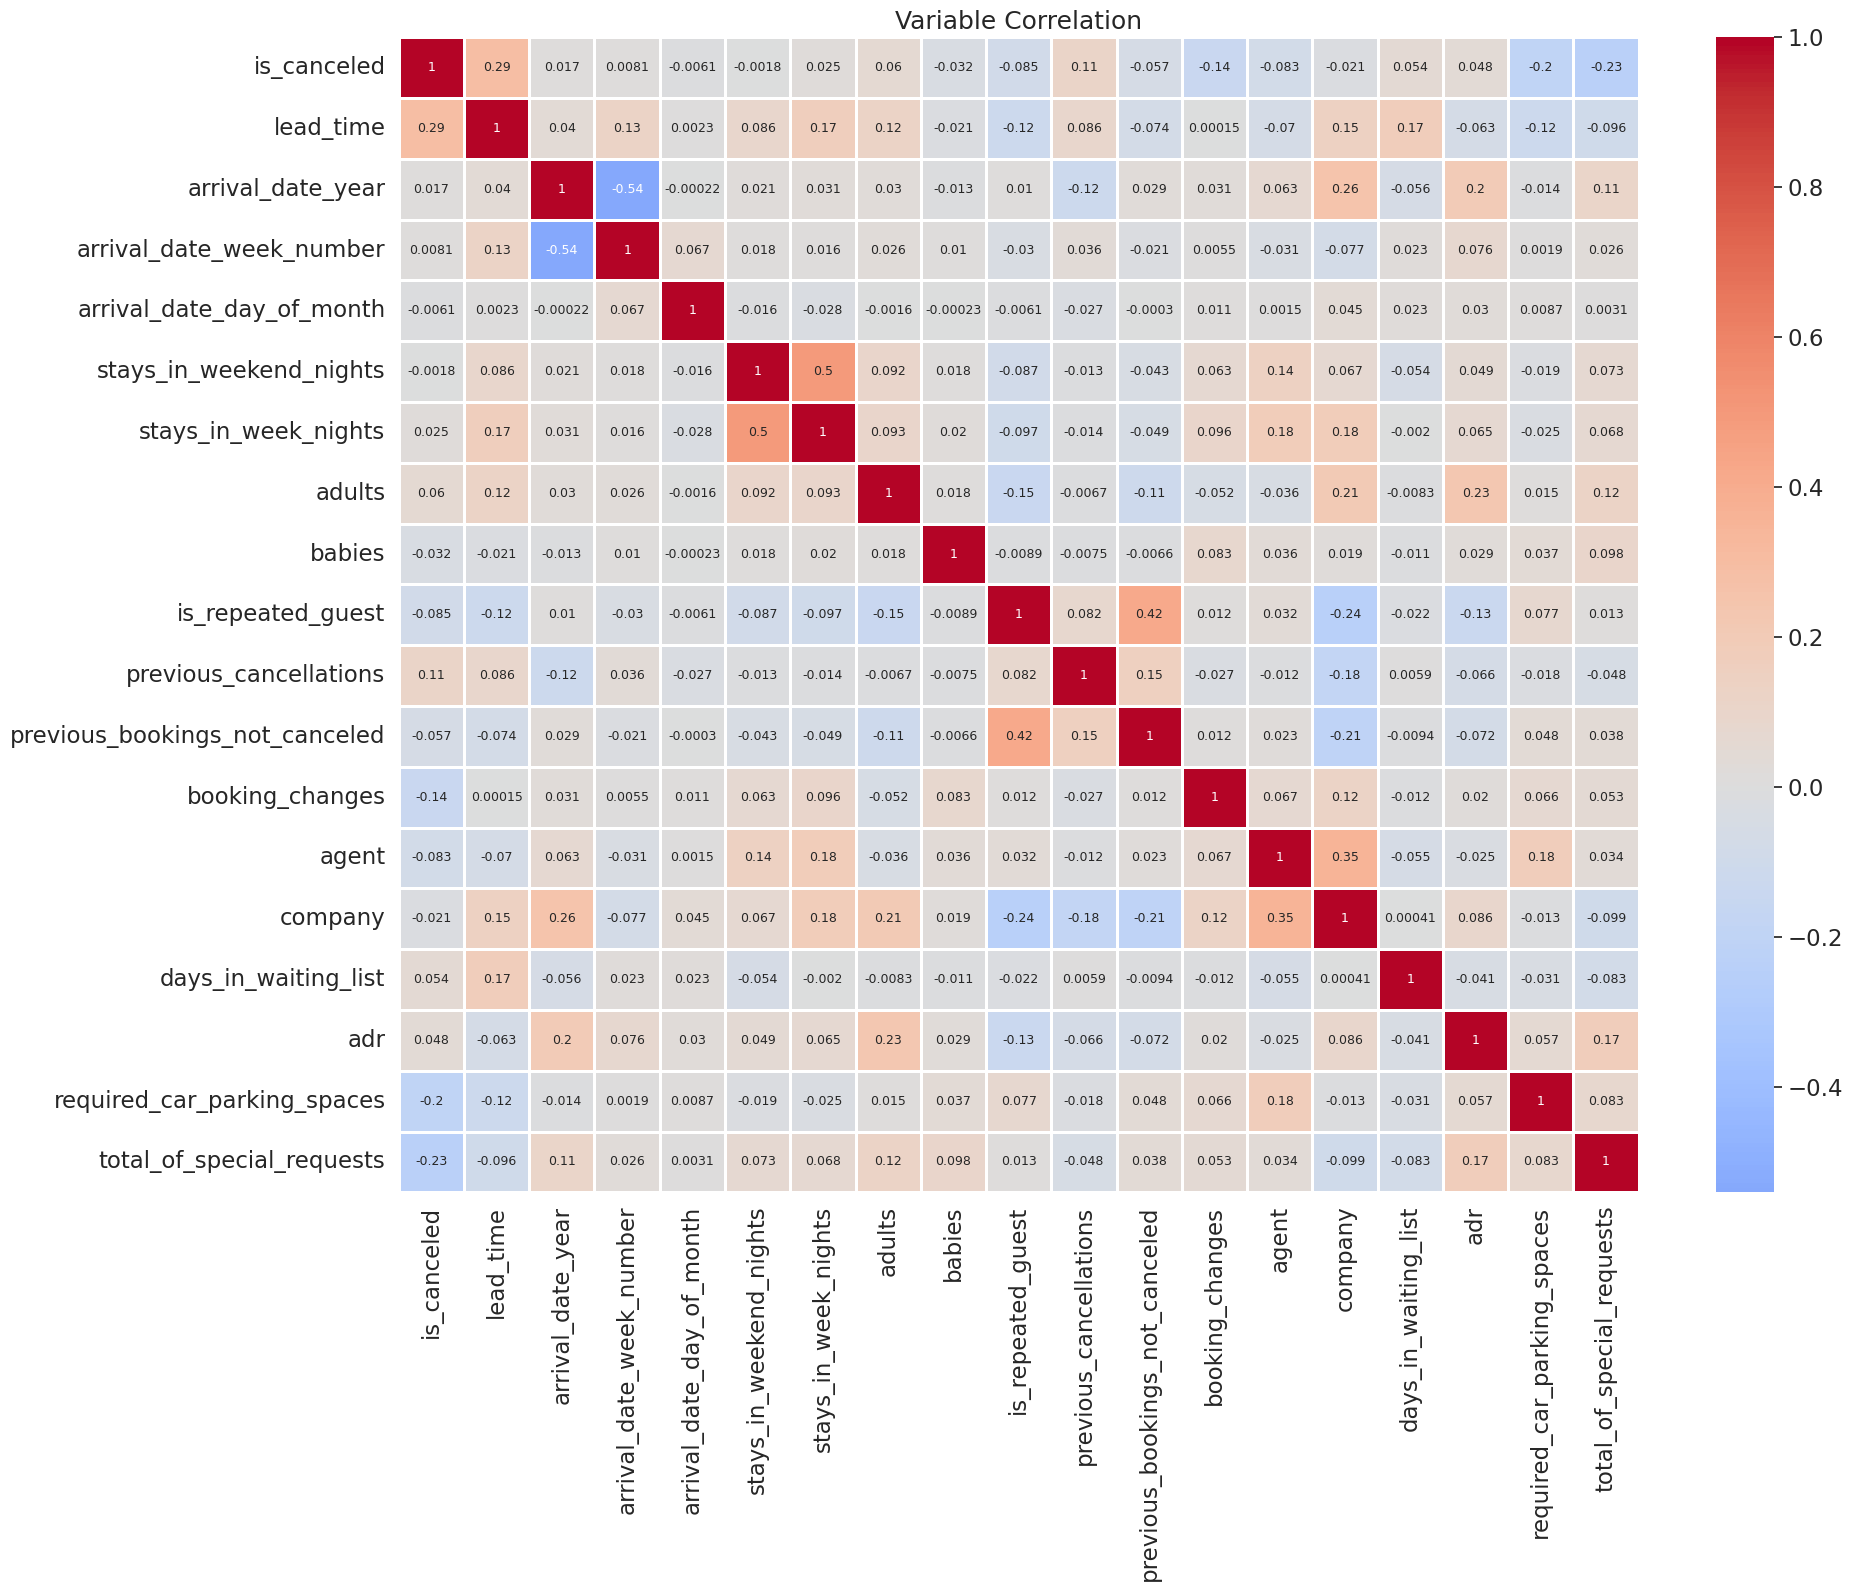

In [15]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(20,15))

sns.heatmap(dff.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# Correlation Analysis
Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low to high .

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

From the Above Matrix we can conclude that G1, G2, G3 are highly correlated as well as Dalc and Walc seems to be correlated.


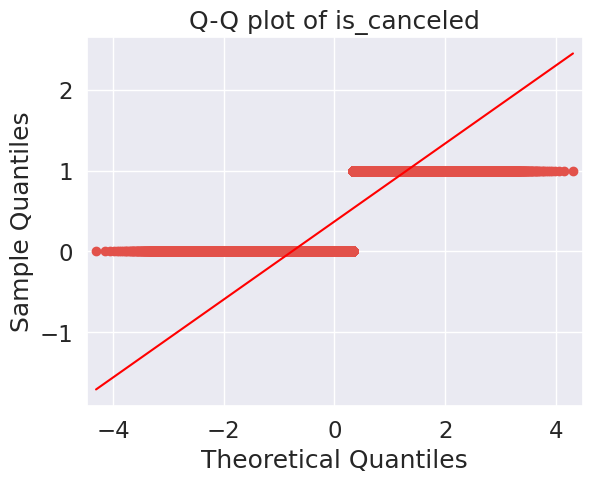

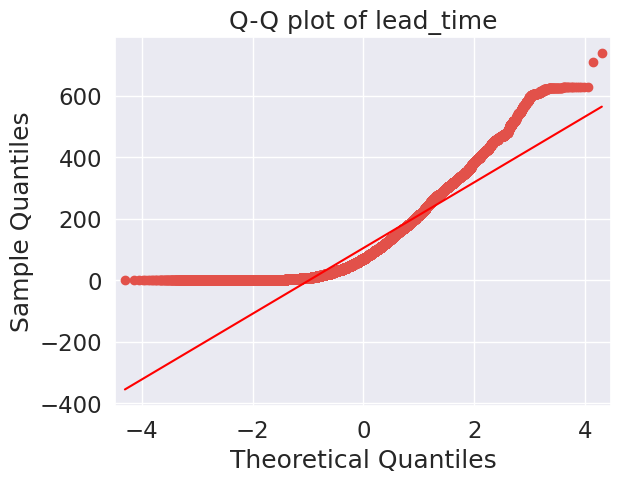

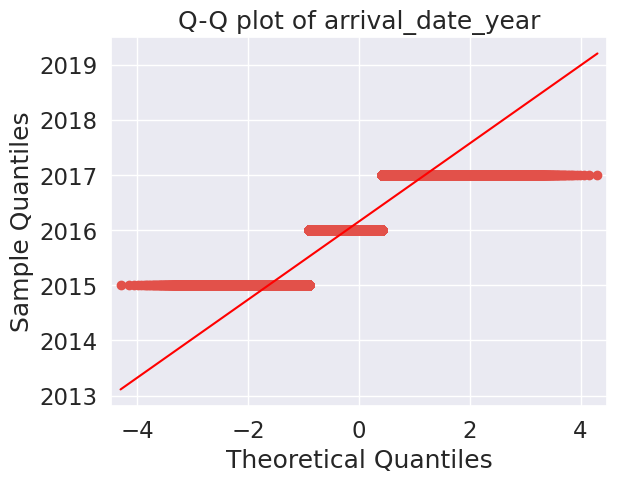

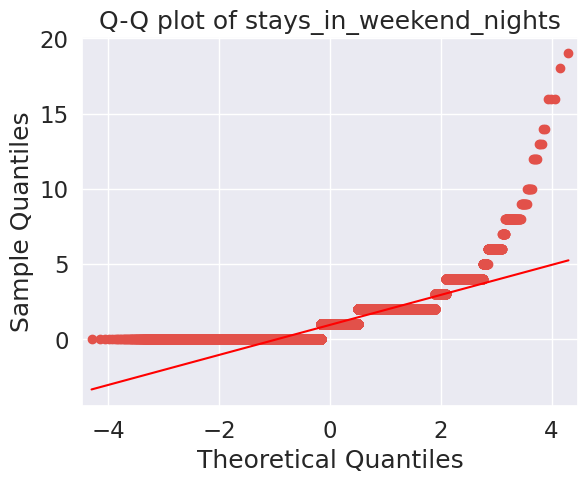

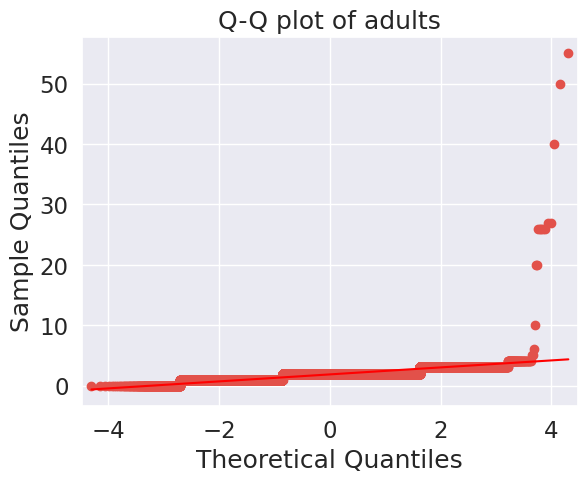

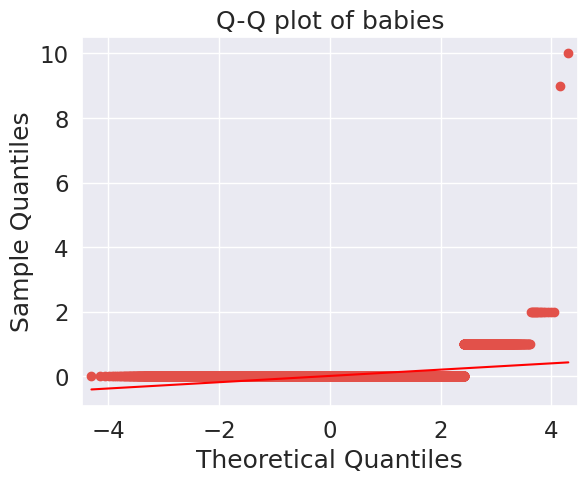

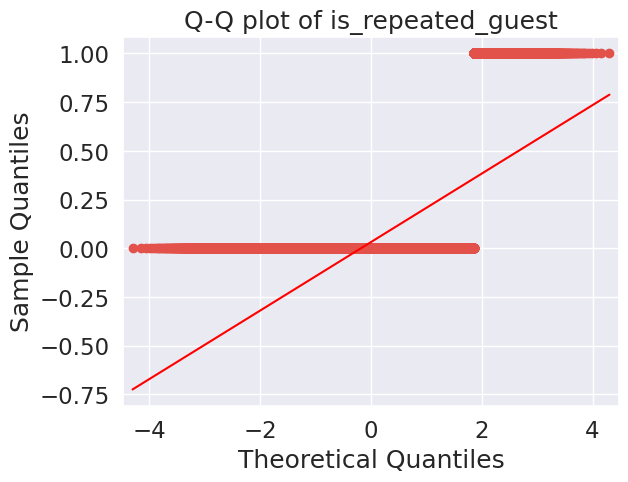

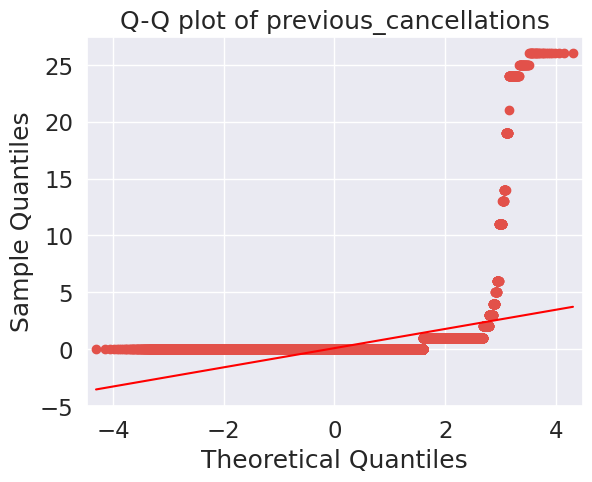

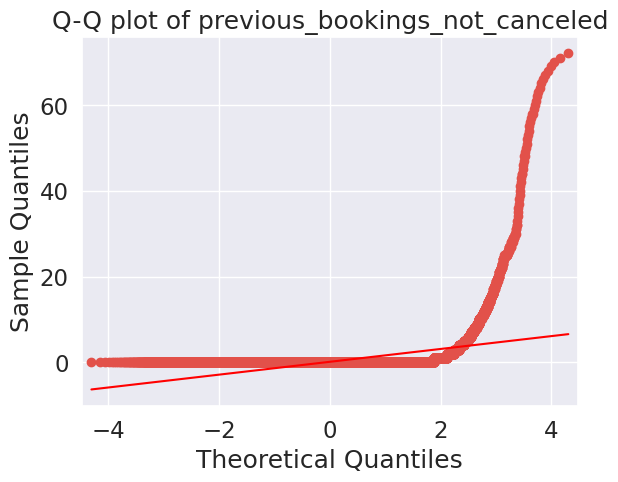

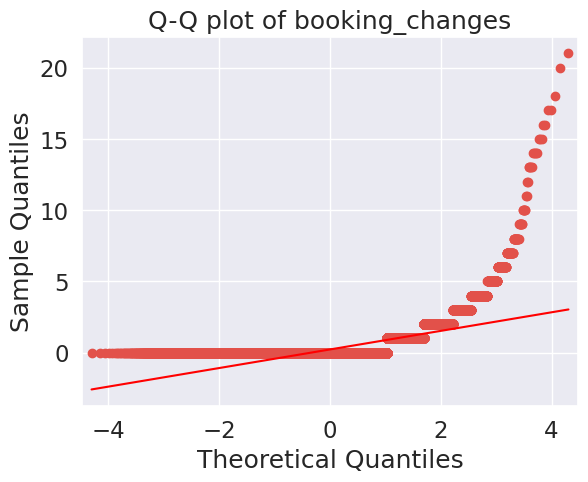

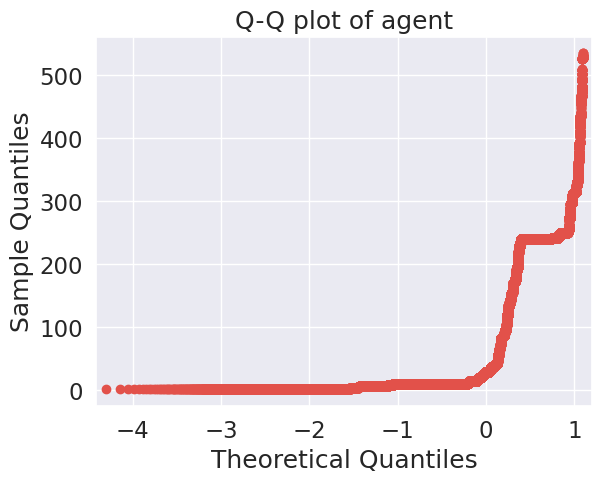

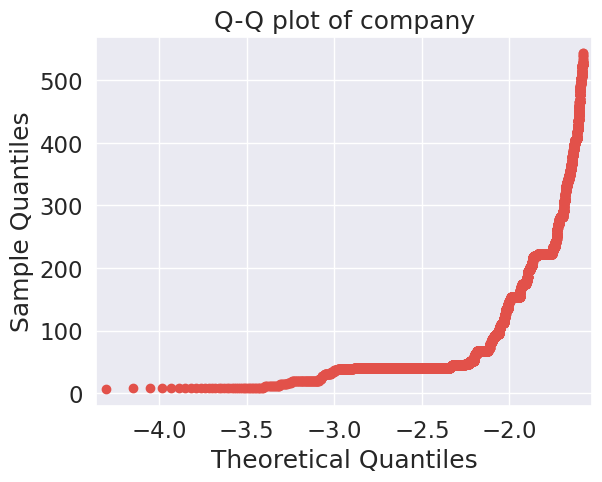

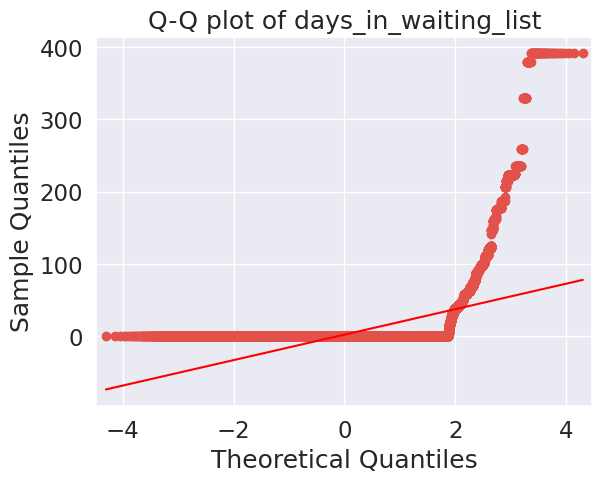

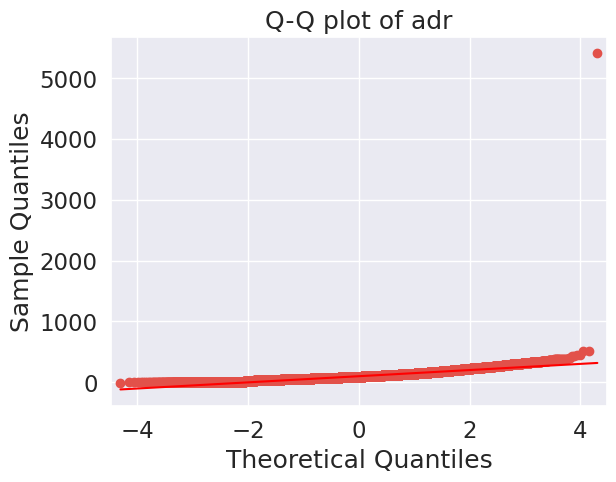

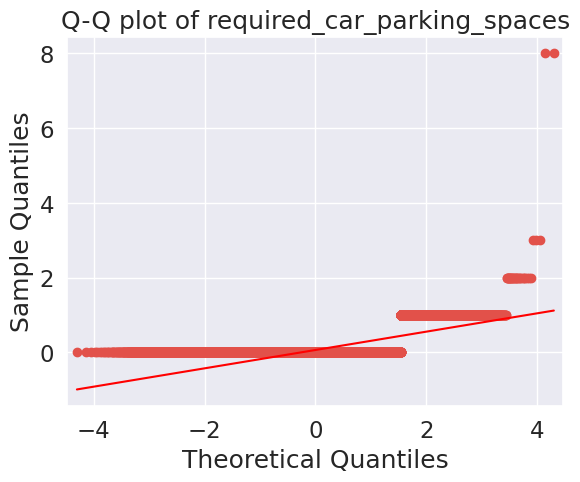

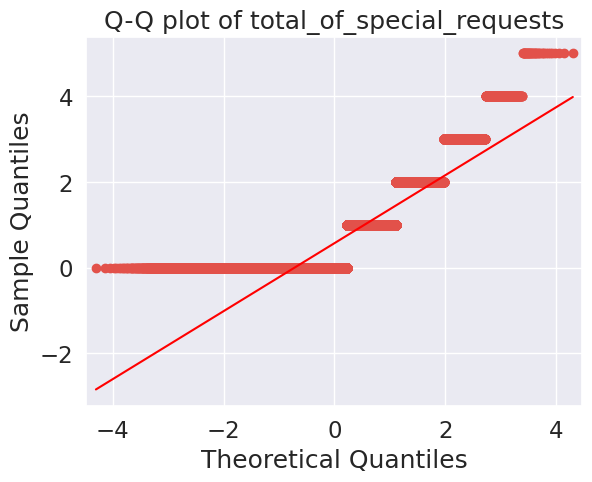

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dff' is your DataFrame
# Filtering for numeric columns only
numeric_cols = dff.select_dtypes(include=['number']).columns

for col in numeric_cols:
    sm.qqplot(dff[col], line='s')
    plt.title('Q-Q plot of ' + col)
    plt.show()


In [17]:
df = h2o.H2OFrame(
    dff
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
df.types

{'hotel': 'enum',
 'is_canceled': 'int',
 'lead_time': 'int',
 'arrival_date_year': 'int',
 'arrival_date_month': 'enum',
 'arrival_date_week_number': 'int',
 'arrival_date_day_of_month': 'int',
 'stays_in_weekend_nights': 'int',
 'stays_in_week_nights': 'int',
 'adults': 'int',
 'babies': 'int',
 'meal': 'enum',
 'country': 'enum',
 'market_segment': 'enum',
 'distribution_channel': 'enum',
 'is_repeated_guest': 'int',
 'previous_cancellations': 'int',
 'previous_bookings_not_canceled': 'int',
 'reserved_room_type': 'enum',
 'assigned_room_type': 'enum',
 'booking_changes': 'int',
 'deposit_type': 'enum',
 'agent': 'int',
 'company': 'enum',
 'days_in_waiting_list': 'int',
 'customer_type': 'enum',
 'adr': 'real',
 'required_car_parking_spaces': 'int',
 'total_of_special_requests': 'int',
 'reservation_status': 'enum',
 'reservation_status_date': 'enum'}

In [19]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [20]:
print(df_train.shape)
print(df_test.shape)

(95576, 31)
(23814, 31)


In [21]:
df_train.head()

hotel           is_canceled    lead_time    arrival_date_year  arrival_date_month      arrival_date_week_number    arrival_date_day_of_month    stays_in_weekend_nights    stays_in_week_nights    adults    babies  meal    country    market_segment    distribution_channel      is_repeated_guest    previous_cancellations    previous_bookings_not_canceled  reserved_room_type    assigned_room_type      booking_changes  deposit_type      agent    company    days_in_waiting_list  customer_type       adr    required_car_parking_spaces    total_of_special_requests  reservation_status    reservation_status_date
------------  -------------  -----------  -------------------  --------------------  --------------------------  ---------------------------  -------------------------  ----------------------  --------  --------  ------  ---------  ----------------  ----------------------  -------------------  ------------------------  --------------------------------  --------------------  --------------------  -----------------  --------------  -------  ---------  ----------------------  ---------------  ------  -----------------------------  ---------------------------  --------------------  -------------------------
Resort Hotel              0          342                 2015  July                                          27                            1                          0                       0         2         0  BB      PRT        Direct            Direct                                    0                         0                                 0  C                     C                                     3  No Deposit          nan        nan                       0  Transient          0                                 0                            0  Check-Out             01/07/2015
Resort Hotel              0          737                 2015  July                                          27                            1                          0                       0         2         0  BB      PRT        Direct            Direct                                    0                         0                                 0  C                     C                                     4  No Deposit          nan        nan                       0  Transient          0                                 0                            0  Check-Out             01/07/2015
Resort Hotel              0            7                 2015  July                                          27                            1                          0                       1         1         0  BB      GBR        Direct            Direct                                    0                         0                                 0  A                     C                                     0  No Deposit          nan        nan                       0  Transient         75                                 0                            0  Check-Out             02/07/2015
Resort Hotel              0           14                 2015  July                                          27                            1                          0                       2         2         0  BB      GBR        Online TA         TA/TO                                     0                         0                                 0  A                     A                                     0  No Deposit          240        nan                       0  Transient         98                                 0                            1  Check-Out             03/07/2015
Resort Hotel              0            0                 2015  July                                          27                            1                          0                       2         2         0  BB      PRT        Direct            Direct                                    0                         0                                 0  C                     C                  

In [22]:
X = df.columns
print(X)

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [23]:
# Set target and predictor variables
y = "lead_time"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [24]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [25]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240220_32128


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  4/8
# GBM base models (used / total)      1/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 483.48344645942484
RMSE: 21.988257012765356
MAE: 14.044838315479138
RMSLE: NaN
Mean Residual Deviance: 483.48344645942484
R^2: 0.957209338476776
Null degrees of freedom: 9902
Residual degrees of freedom: 9898
Null deviance: 111894352.84186932
Residual deviance: 4787936.570287684
AIC: 89326.10870622755

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 1572.306604803696
RMSE: 39.65232155629347
MAE: 24.982120843380923
RMSLE: NaN
Mean Residual Deviance: 1572.306604803696
R^2: 0.8641134852243397
Null degrees of freedom: 9459
Residual degrees of freedom: 9455
Null deviance: 109489090.74520522
Residual deviance: 14874020.481442964
AIC: 96486.74554277532

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Understanding the Parameters
Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

Null Degrees of Freedom: The Null Degrees of Freedom is the number of observations in the dataset minus 1. It represents the number of observations in the dataset that are free to vary, given the number of parameters in the model.

Residual Degrees of Freedom: The Residual Degrees of Freedom is the number of observations in the dataset minus the number of parameters in the model. It represents the number of observations in the dataset that are free to vary after taking into account the number of parameters in the model.

Null Deviance: The Null Deviance is the deviance of the null model, which is the model with no independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

Residual Deviance: The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

Akaike Information Criterion (AIC): The AIC is a measure of the quality of a model that takes into account the complexity of the model. It is calculated as the negative log-likelihood of the model plus twice the number of parameters in the model. The AIC can be used to compare the quality of different models, with lower values indicating better quality.



In [26]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                   rmse      mse      mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240220_32128     39.6523  1572.31  24.9821  nan                         1572.31
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_32128  39.6845  1574.86  24.9126  nan                         1574.86
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_32128  39.728   1578.31  24.9836  nan                         1578.31
XGBoost_1_AutoML_1_20240220_32128                       41.7284  1741.26  26.8214  nan                         1741.26
GBM_1_AutoML_1_20240220_32128                           43.8548  1923.24  26.9106  nan                         1923.24
XGBoost_2_AutoML_1_20240220_32128                       47.1438  2222.53  32.4244  nan                         2222.53
GBM_3_AutoML_1_20240220_32128                           50.1298  2512.99  34.3091  nan                         2512.99
GBM_4_AutoML_1_20240220_32128                   

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_12614  with rmse score of 1.65929

The models are then listed in descending order based on their rmse scores.

In [27]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_1_AutoML_1_20240220_32128': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_32128': 1,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_32128': 2,
 'XGBoost_1_AutoML_1_20240220_32128': 3,
 'GLM_1_AutoML_1_20240220_32128': 10}

In [28]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

3


In [29]:
best_model.algo

'xgboost'

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

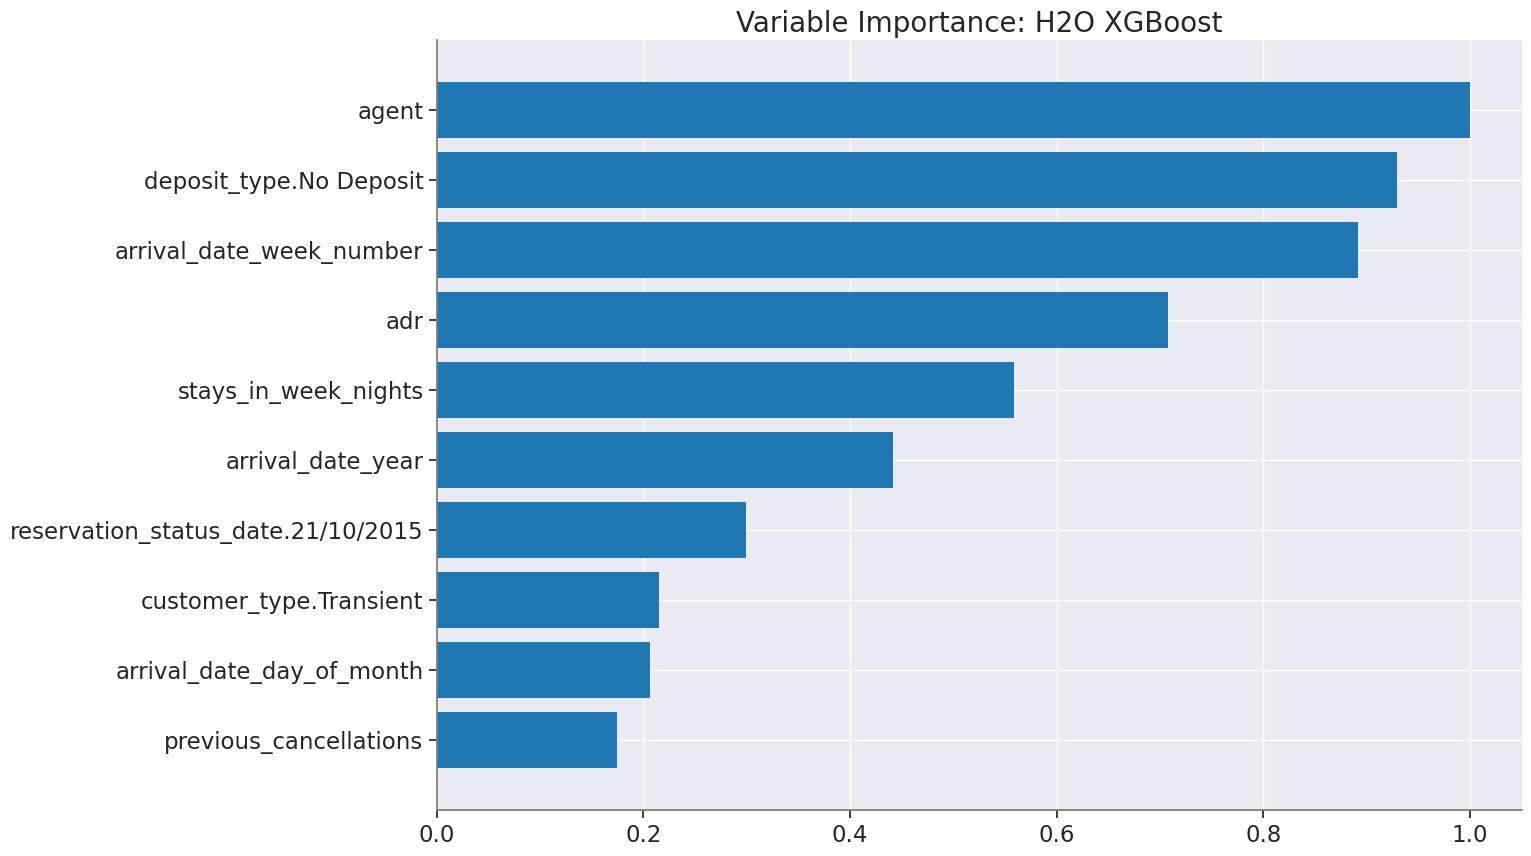

<Figure size 640x480 with 0 Axes>

In [31]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model

We can Interpret that G3 is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)

10
glm


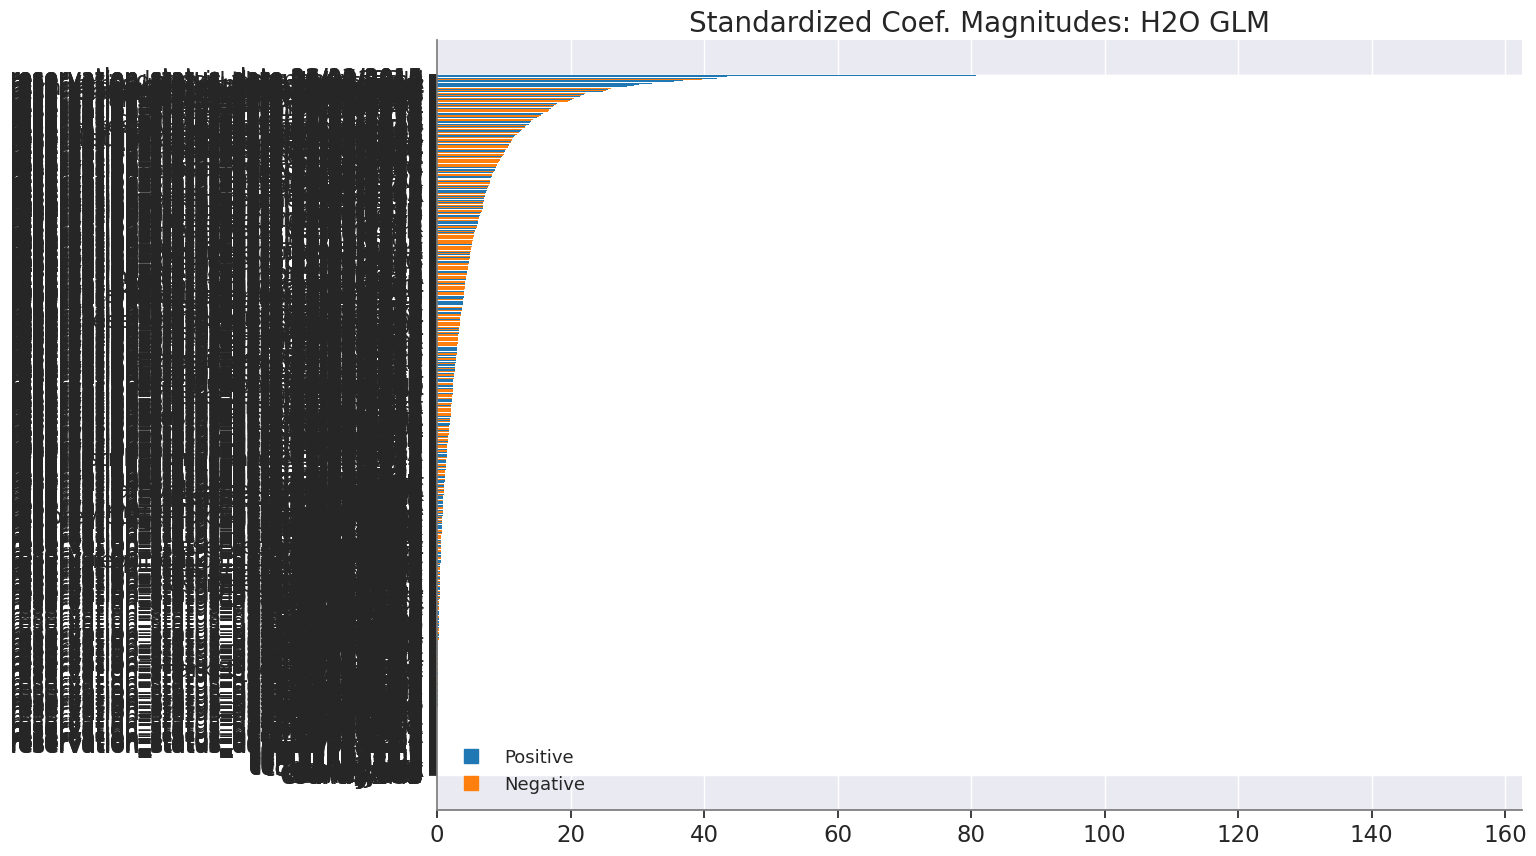

In [32]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage.

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

From the above results, we observe that G2, G1, absences are some of the important features.

In [33]:
print(best_model.rmse(train=True))

26.907614353381256


In [34]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [35]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 1767.4374399013961,
 'rmse': 42.04090198724804,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [36]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [37]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
          predict
0        1.085179
1       49.891289
2       88.237274
3       91.561562
4       70.915840
...           ...
23809  126.663109
23810   41.390968
23811   49.410484
23812  206.979935
23813  208.289566

[23814 rows x 1 columns]


In [38]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


lead_time
0             13
1             14
2             85
3             35
4             68
...          ...
23809        165
23810        109
23811         44
23812        164
23813        205

[23814 rows x 1 columns]

In [39]:
print(X)

['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


# Regularization
In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [40]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

hotel_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
hotel_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
hotel_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
hotel_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.

The first instance of the H2OGeneralizedLinearEstimator class is created with the family parameter set to "gaussian", which means that the response variable is assumed to have a normal (Gaussian) distribution. The lambda_ parameter is set to 0, which means that no regularization is applied. The compute_p_values parameter is set to True, which means that p-values will be computed for the coefficients of the GLM model. The nfolds parameter is set to 5, which means that the data will be split into 5 folds for cross-validation.

The next three instances of the H2OGeneralizedLinearEstimator class are created with different settings for regularization. The second instance uses ridge regularization (alpha=0), the third instance uses lasso regularization (alpha=1), and the fourth instance uses lambda search to find the optimal value of lambda for elastic net regularization.

This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.


In [41]:
# Initialize the GLM model
hotel_glm = H2OGeneralizedLinearEstimator()
# Train the model
hotel_glm.train(x=X, y=y, training_frame=df_train)



glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708399232085_12


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.06316 )  1538                          207                            1                       py_2_sid_baa9

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 6103.950456914552
RMSE: 78.12778287468903
MAE: 59.15140189712914
RMSLE: NaN
Mean Residual Deviance: 6103.950456914552
R^2: 0.467839848328793
Null degrees of freedom: 95575
Residual degrees of freedom: 95368
Null deviance: 1096269923.7024703
Residual deviance: 583391168.8700652
AIC: 1104757.441139501

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  -----------------  -----------------
    2024-02-20 03:25:40  0.000 sec   0             1096269923.7024703         11470.138148724263
    2024-02-20 03:25:40  0.915 sec   1                                                            78.12778287468903  6103.950456914552    59.15140189712914  0.467839848328793

Variable Importances: 
variable                            relative_importance    scaled_importance    percentage
----------------------------------  ---------------------  -------------------  --------------------
reservation_status_date.21/10/2015  52.44780731201172      1.0                  0.05221035986478221
deposit_type.Non Refund             33.80015563964844      0.6444531691967883   0.033647131879763696
deposit_type.No Deposit             33.197235107421875     0.6329575402443749   0.03304694095528618
arrival_date_month.July             31.05687141418457      0.5921481374698357   0.03091626735056065
market_segment.Groups               30.759765625           0.5864833479502837   0.03062050665118659
arrival_date_year                   25.315881729125977     0.4826871327245758   0.025201268901649997
arrival_date_month.December         25.084972381591797     0.4782844825592314   0.024971404952158622
arrival_date_week_number            21.464223861694336     0.40924921291759225  0.02136704868080637
arrival_date_month.August           21.156736373901367     0.40338647997312943  0.02106095328398485
meal.HB                             20.75590705871582      0.39574403816806     0.020661938647096516
---                                 ---                    ---                  ---
reserved_room_type.L                0.0                    0.0                  0.0
reserved_room_type.P                0.0                    0.0                  0.0
market_segment.Undefined            0.0                    0.0                  0.0
distribution_channel.GDS            0.0                    0.0                  0.0
distribution_channel.Undefined      0.0                    0.0                  0.0
deposit_type.Refundable             0.0                    0.0                  0.0
hotel.City Hotel                    0.0                    0.0                  0.0
hotel.Resort Hotel                  0.0                    0.0                  0.0
arrival_date_day_of_month           0.0                    0.0                  0.0
booking_changes                     0.0                    0.0                  0.0
[1538 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Ridge Regularization

In [42]:
hotel_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708399232085_13


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.03158 )  1538                          1512                           1                       py_2_sid_baa9

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 6035.429627540808
RMSE: 77.68802756886551
MAE: 58.784587984416824
RMSLE: NaN
Mean Residual Deviance: 6035.429627540808
R^2: 0.4738136934983359
Null degrees of freedom: 95575
Residual degrees of freedom: 94063
Null deviance: 1096269923.7024703
Residual deviance: 576842222.0818403
AIC: 1106288.4706657475

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 6147.62193122125
RMSE: 78.4067722280496
MAE: 59.29440491846573
RMSLE: NaN
Mean Residual Deviance: 6147.62193122125
R^2: 0.46403244219815654
Null degrees of freedom: 95575
Residual degrees of freedom: 94107
Null deviance: 1096282469.1959333
Residual deviance: 587565113.6984022
AIC: 1107960.8169457105

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     59.294       0.190105     59.1571       59.099        59.4582       59.2249       59.5307
mean_residual_deviance  6147.8       105.124      6299.71       6055.1        6132.13       6050.73       6201.32
mse                     6147.8       105.124      6299.71       6055.1        6132.13       6050.73       6201.32
null_deviance           2.19256e+08  3.66047e+06  2.18074e+08   2.17138e+08   2.18334e+08   2.17013e+08   2.25724e+08
r2                      0.463975     0.00778029   0.451297      0.469218      0.465433      0.462847      0.471081
residual_deviance       1.17513e+08  1.9198e+06   1.19657e+08   1.15253e+08   1.16713e+08   1.16561e+08   1.19382e+08
rmse                    78.4056      0.669203     79.3707       77.8145       78.3079       77.7864       78.7485
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  ------------------  ------------------
    2024-02-20 03:25:48  0.000 sec   0             1096269923.7024703         11470.138148724263
    2024-02-20 03:25:48  0.673 sec   1                                                            77.68802756886551  6035.429627540808    58.784587984416824  0.4738136934983359

Variable Importances: 
variable                            relative_importance    scaled_importance    percentage
----------------------------------  ---------------------  -------------------  --------------------
reservation_status_date.21/10/2015  52.961692810058594     1.0                  0.033533151021807935
deposit_type.Non Refund             33.996002197265625     0.641897952906993    0.021524860995419556
deposit_type.No Deposit             33.38338088989258      0.6303306997685757   0.021136974549021526
arrival_date_month.July             31.25478172302246      0.5901394019846452   0.019789233690670528
market_segment.Groups               30.600868225097656     0.577792487389789    0.01937520273890785
arrival_date_year                   25.422496795654297     0.4800166959698464   0.016096

# Lasso Regularization

In [43]:
hotel_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708399232085_14


GLM Model: summary
    family    link      regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 0.03158 )  1538                          179                            1                       py_2_sid_baa9

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 5165.253531636507
RMSE: 71.86969828541447
MAE: 54.23829444800847
RMSLE: NaN
Mean Residual Deviance: 5165.253531636507
R^2: 0.5496781760896916
Null degrees of freedom: 95575
Residual degrees of freedom: 95396
Null deviance: 1096269923.7024703
Residual deviance: 493674271.5396908
AIC: 1088741.9705001868

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 5298.163581290325
RMSE: 72.78848522458978
MAE: 54.72798142277026
RMSLE: NaN
Mean Residual Deviance: 5298.163581290325
R^2: 0.538090691446483
Null degrees of freedom: 95575
Residual degrees of freedom: 95433
Null deviance: 1096279918.7720885
Residual deviance: 506377282.4454041
AIC: 1091096.181866395

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     54.7283      0.182827     54.4892       54.7521       54.61         54.8387       54.9514
mean_residual_deviance  5298.2       194.362      5126.28       5235.59       5249.55       5245.93       5633.65
mse                     5298.2       194.362      5126.28       5235.59       5249.55       5245.93       5633.65
null_deviance           2.19256e+08  3.04301e+06  2.15722e+08   2.18657e+08   2.20868e+08   2.17482e+08   2.23551e+08
r2                      0.538177     0.0114902    0.543879      0.544905      0.544534      0.539589      0.51798
residual_deviance       1.01275e+08  3.71463e+06  9.83937e+07   9.95077e+07   1.00592e+08   1.00129e+08   1.07755e+08
rmse                    72.7791      1.32224      71.598        72.3574       72.4538       72.4288       75.0577
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  -----------------  ------------------
    2024-02-20 03:25:52  0.000 sec   0             1096269923.7024703         11470.138148724263
    2024-02-20 03:25:52  0.591 sec   1                                                            71.86969828541447  5165.253531636507    54.23829444800847  0.5496781760896916

Variable Importances: 
variable                            relative_importance    scaled_importance    percentage
----------------------------------  ---------------------  -------------------  --------------------
reservation_status_date.21/10/2015  206.08279418945312     1.0                  0.04350296921451017
reservation_status_date.01/01/2015  141.6237030029297      0.6872175018780762   0.02989600182787453
reservation_status_date.17/10/2014  128.8400115966797      0.6251856789084309   0.027197433342906106
company.233.0                       123.78326416015625     0.6006482231911198   0.026129981162233515
reservation_status_date.23/07/2015  112.062744140625       0.5437753529176486   0.023655842437585863
reservation_status_date.16/10/2016  104.79786682128906     0.5085231265107352   0.022122265917462

# Which Regularization Method Helps ?

The R-squared (R²) values for all three models are similar, indicating that they all explain a similar amount of variance in the target variable.

However, the MSE, RMSE, and MAE values are slightly lower for the ridge regression model than the other two models.

Additionally, the ridge regression model has the lowest AIC score.

The lasso regression model has the highest RMSLE value, indicating that it may not perform well when predicting values that are significantly different from the average.

Overall, the ridge regression model appears to be the best performing model based on the evaluation metrics used.

In [44]:
lambda_search = hotel_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [45]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708399232085_15


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.006316 )  nlambda = 100, lambda.max = 63.156, lambda.min = 0.006316, lambda.1se = -1.0  1538                          911                            100                     py_2_sid_baa9

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 5255.945776857673
RMSE: 72.49790187900388
MAE: 54.598306484465105
RMSLE: NaN
Mean Residual Deviance: 5255.945776857673
R^2: 0.5417713624100973
Null degrees of freedom: 95575
Residual degrees of freedom: 94664
Null deviance: 1096269923.7024703
Residual deviance: 502342273.568949
AIC: 1091869.5450294672

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      alpha    iterations    training_rmse      training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  -------  ------------  -----------------  -------------------  ------------------  ------------------
     2024-02-20 03:25:54  0.000 sec   1            .63E2     1             11470.13814872379   0.5
     2024-02-20 03:25:54  0.088 sec   2            .58E2     2             11464.22025612147   0.5
     2024-02-20 03:25:54  0.119 sec   3            .52E2     2             11457.764024436177  0.5
     2024-02-20 03:25:54  0.160 sec   4            .48E2     2             11450.750699102266  0.5
     2024-02-20 03:25:54  0.207 sec   5            .44E2     2             11443.139525111694  0.5
     2024-02-20 03:25:54  0.238 sec   6            .4E2      2             11434.888178083813  0.5
     2024-02-20 03:25:54  0.279 sec   7            .36E2     3             11425.90092909428   0.5
     2024-02-20 03:25:54  0.336 sec   8            .33E2     4             11410.346983768615  0.5
     2024-02-20 03:25:54  0.405 sec   9            .3E2      4             11392.930250535926  0.5
     2024-02-20 03:25:54  0.496 sec   10           .27E2     7             11371.885367931916  0.5
---  ---                  ---         ---          ---       ---           ---                 ---      ---           ---                ---                  ---                 ---
     2024-02-20 03:26:04  10.118 sec  91           .15E-1    716           5549.962410320139   0.5
     2024-02-20 03:26:04  10.409 sec  92           .13E-1    739           5516.850035949617   0.5
     2024-02-20 03:26:04  10.873 sec  93           .12E-1    776           5483.509065643845   0.5
     2024-02-20 03:26:05  11.300 sec  94           .11E-1    801           5451.175063494771   0.5
     2024-02-20 03:26:05  11.940 sec  95           .1E-1     816           5417.835845702887   0.5
     2024-02-20 03:26:06  12.587 sec  96           .92E-2    841           5385.004005591767   0.5
     2024-02-20 03:26:07  13.045 sec  97           .83E-2    861           5352.137259651001   0.5
     2024-02-20 03:26:07  13.614 sec  98           .76E-2    878           5320.337554027962   0.5
     2024-02-20 03:26:08  14.060 sec  99           .69E-2    892           5288.790489017534   0.5
     2024-02-20 03:26:08  14.463 sec  100          .63E-2    912           5255.945776858399   0.5      100           72.49790187900388  5255.945776857673    54.598306484465105  0.5417713624100973
[100 rows x 13 columns]


Variable Importances: 
variable    

In [46]:
coeff_table = hotel_glm._model_json["output"]["coefficients_table"]

In [47]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  \
0                              Intercept -72103.843405   
1     reservation_status_date.01/01/2015     17.421071   
2     reservation_status_date.01/01/2016      0.000000   
3     reservation_status_date.01/01/2017      0.000000   
4     reservation_status_date.01/02/2016      4.084756   
...                                  ...           ...   
1534                               agent     -0.053366   
1535                days_in_waiting_list      0.595462   
1536                                 adr     -0.332374   
1537         required_car_parking_spaces      0.461223   
1538           total_of_special_requests      5.831275   

      standardized_coefficients  
0                    115.290974  
1                     17.421071  
2                      0.000000  
3                      0.000000  
4                      4.084756  
...                         ...  
1534                  -5.906193  
1535                  10.330215  
1536                 -17.001414  
1537                   0.112032  
1538                   4.621401  

[1539 rows x 3 columns]

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse      mse      mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -------  -------  -------  ---------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20240220_32128     39.8966  1591.74  25.069   nan                         1591.74                5481                   0.163758  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_32128  39.9264  1594.11  24.9739  nan                         1594.11                2685                   0.200213  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_32128  39.9476  1595.81  25.0339  nan                         1595.81                9972                   0.200789  StackedEnsemble
XGBoost_1_AutoML_1_20240220_32128                       42.0409  1767.44  26.9931  nan                         1767.44               65117                   0.016359  XGBoost
GBM_1_AutoML_1_20240220_32128                           44.2386  1957.06  26.9737  nan                         1957.06               95712                   0.143457  GBM
XGBoost_2_AutoML_1_20240220_32128                       47.6075  2266.47  32.8703  nan                         2266.47                6714                   0.003109  XGBoost
GBM_3_AutoML_1_20240220_32128                           50.3369  2533.8   34.4169  nan                         2533.8                 6176                   0.023924  GBM
GBM_4_AutoML_1_20240220_32128                           53.1789  2827.99  38.7432    1.2795                    2827.99                6157                   0.015082  GBM
DRF_1_AutoML_1_20240220_32128                           53.8305  2897.72  31.4576    1.06093                   2897.72                7365                   0.00285   DRF
GBM_2_AutoML_1_20240220_32128                           54.7101  2993.19  39.5155  nan                         2993.19                6163                   0.015963  GBM
GLM_1_AutoML_1_20240220_32128                           72.241   5218.76  54.8221  nan                         5218.76                6490                   0.002521  GLM
[11 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

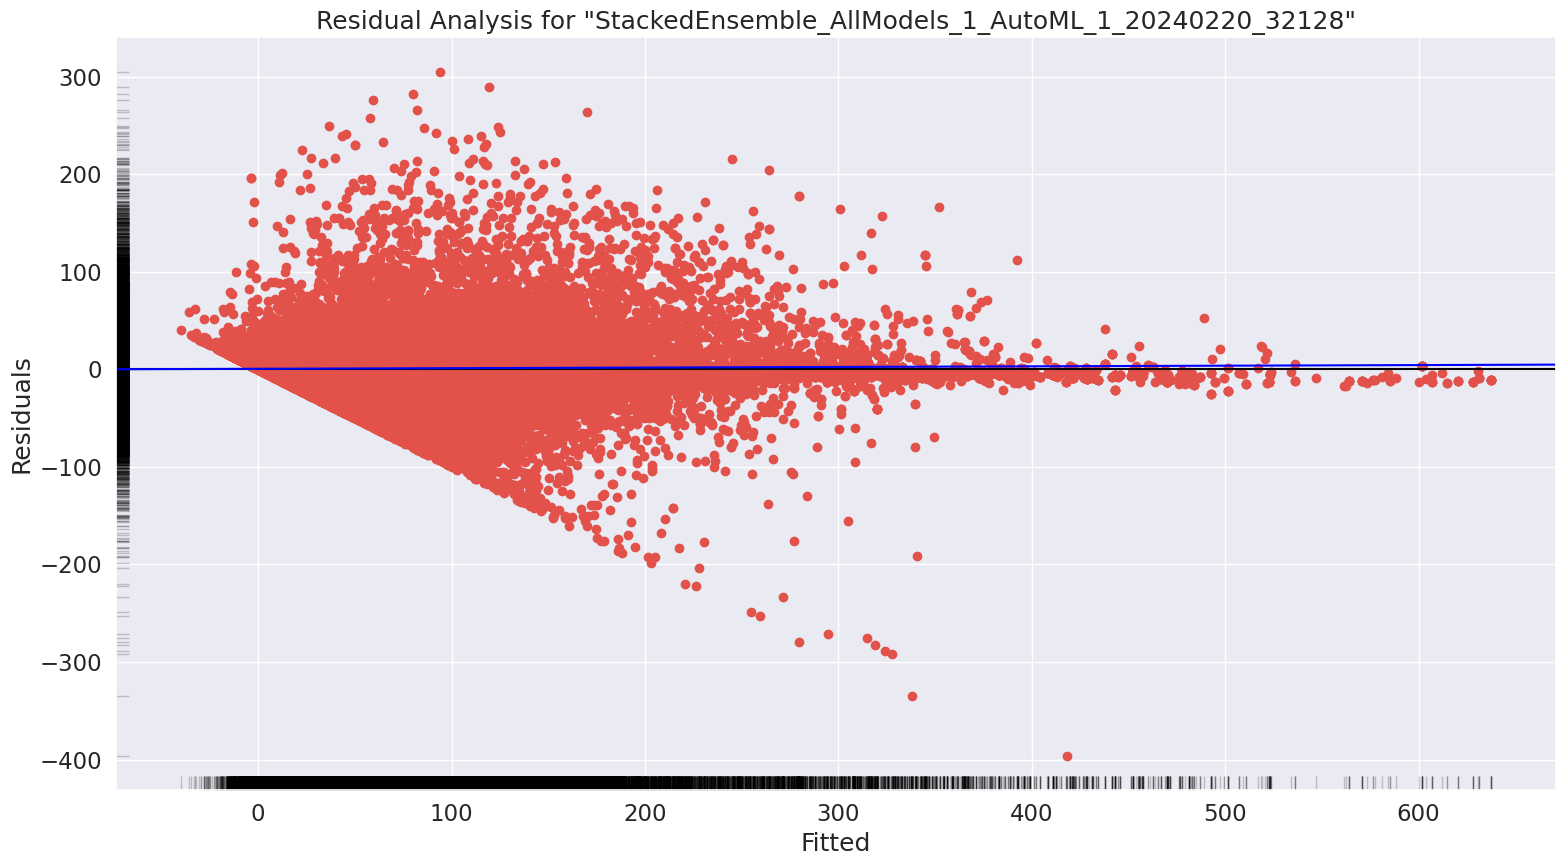

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

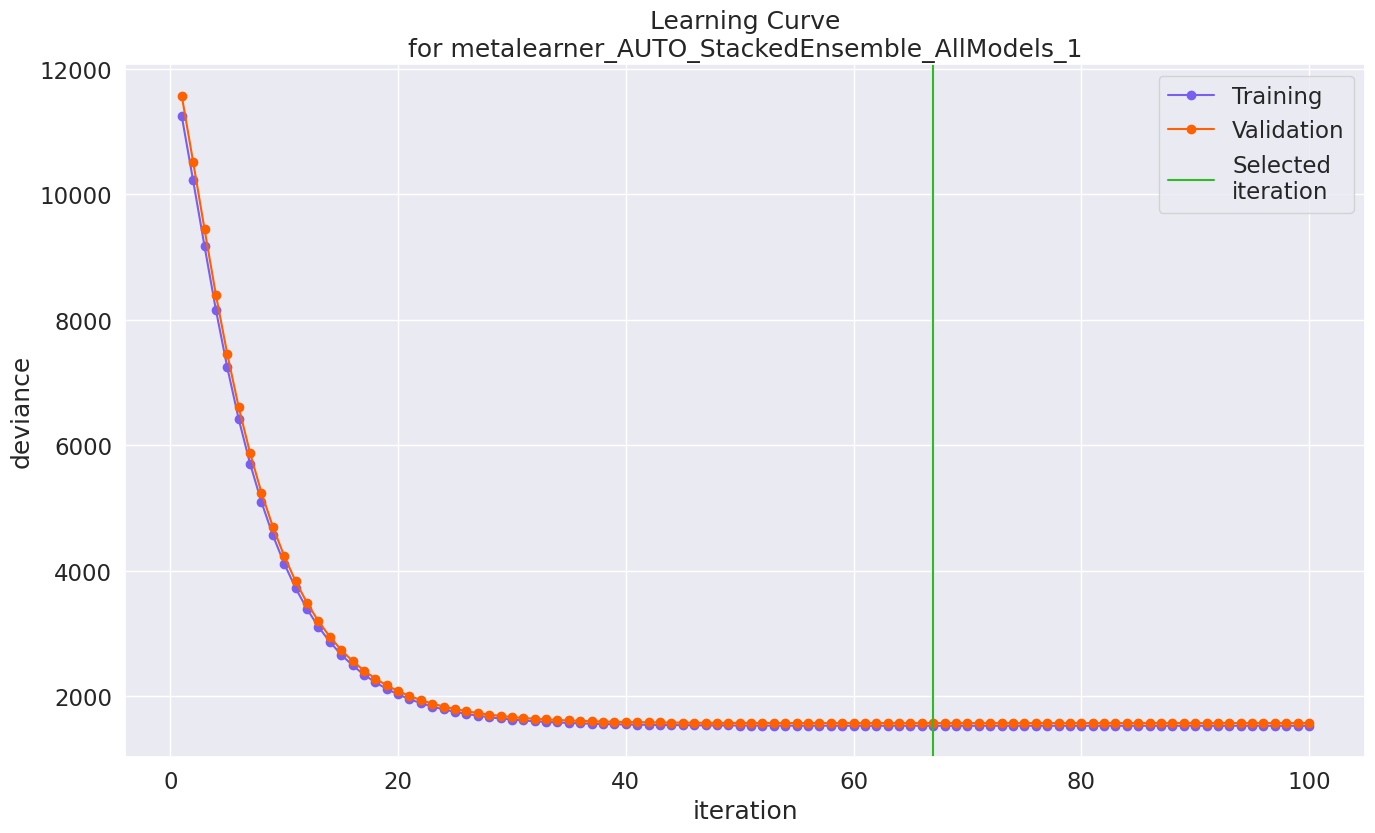

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

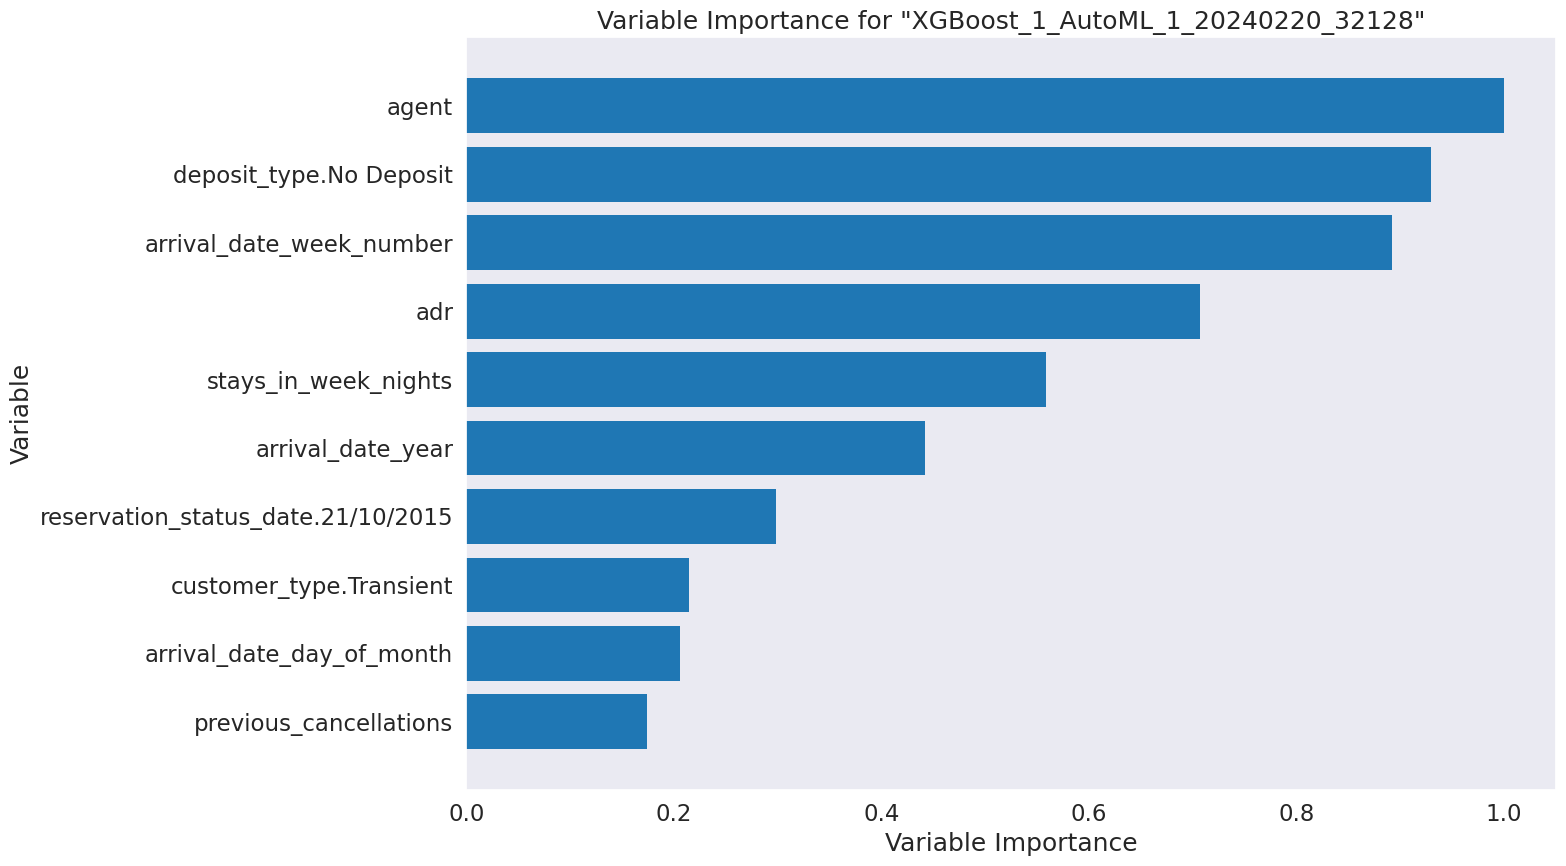

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

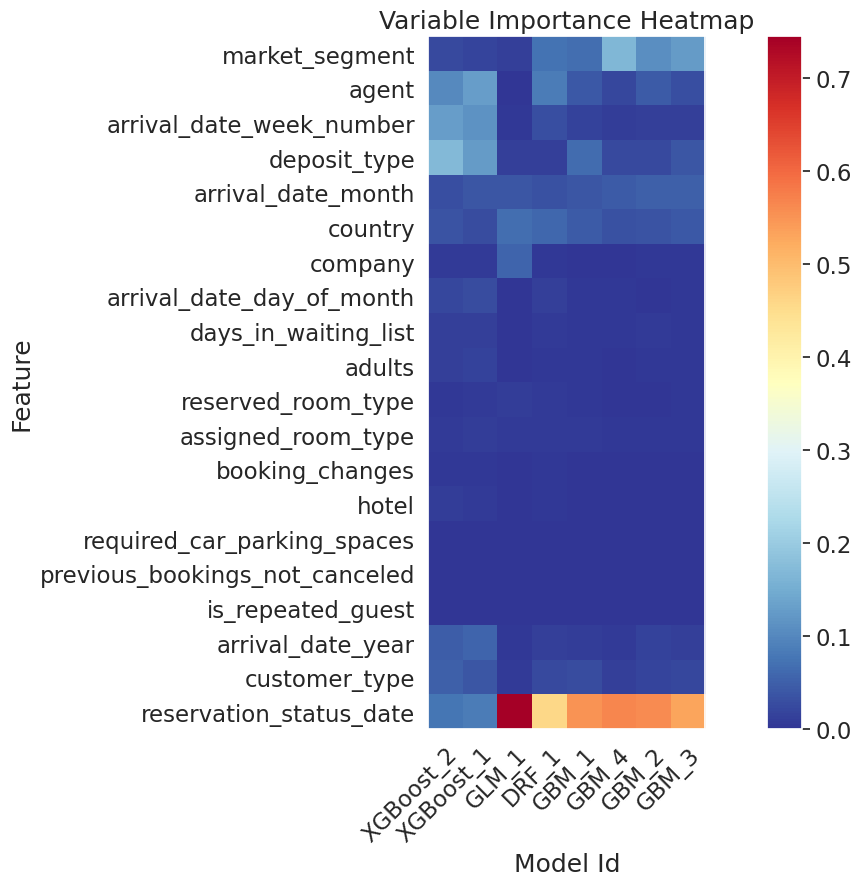

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

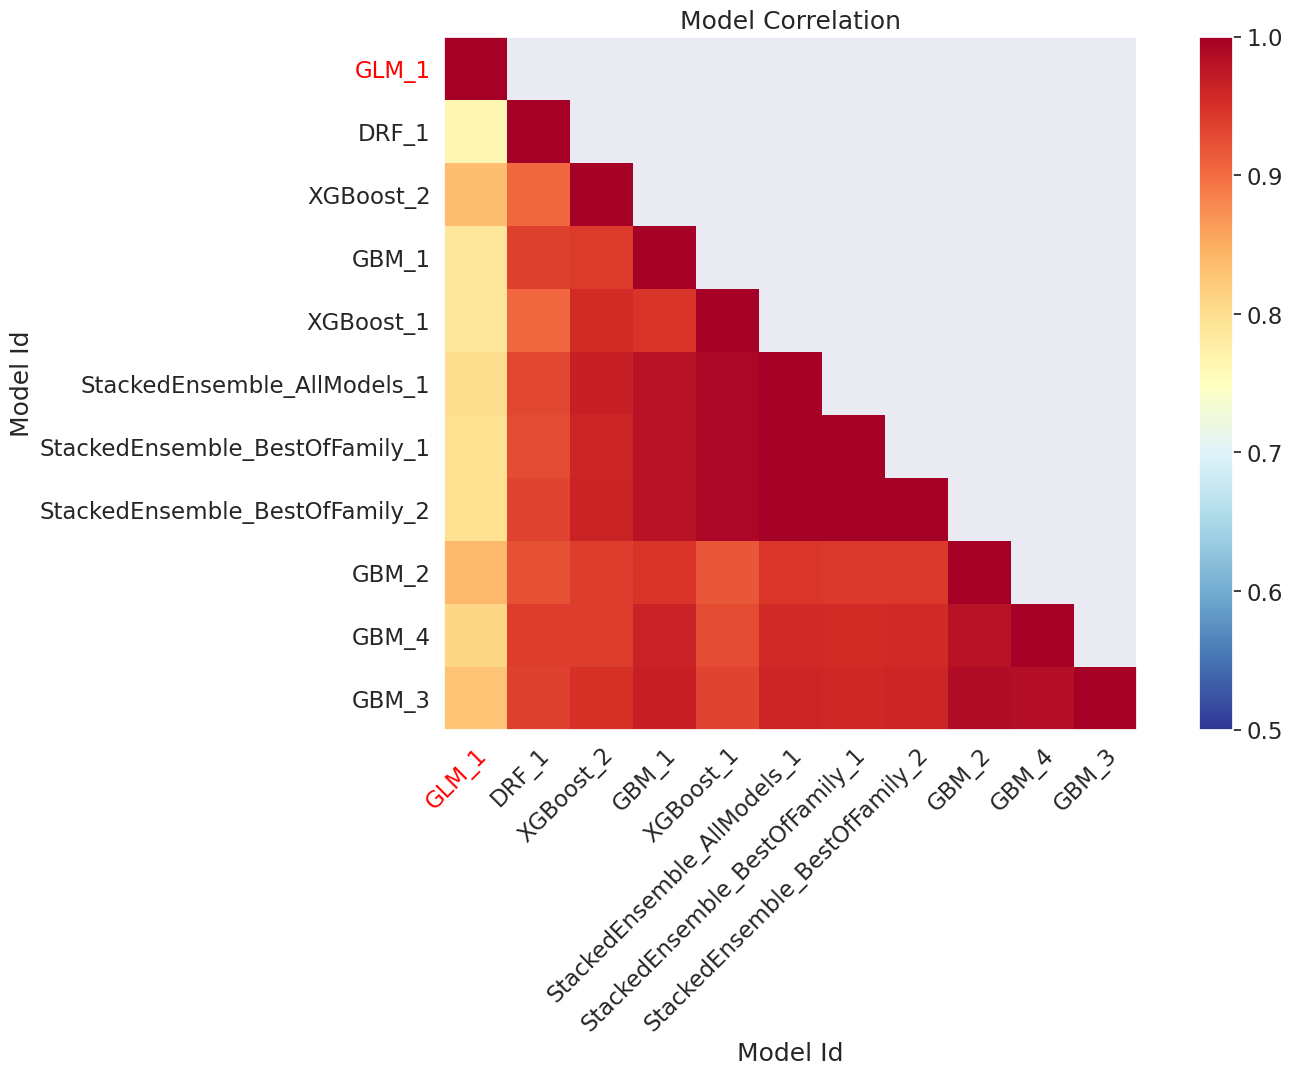

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

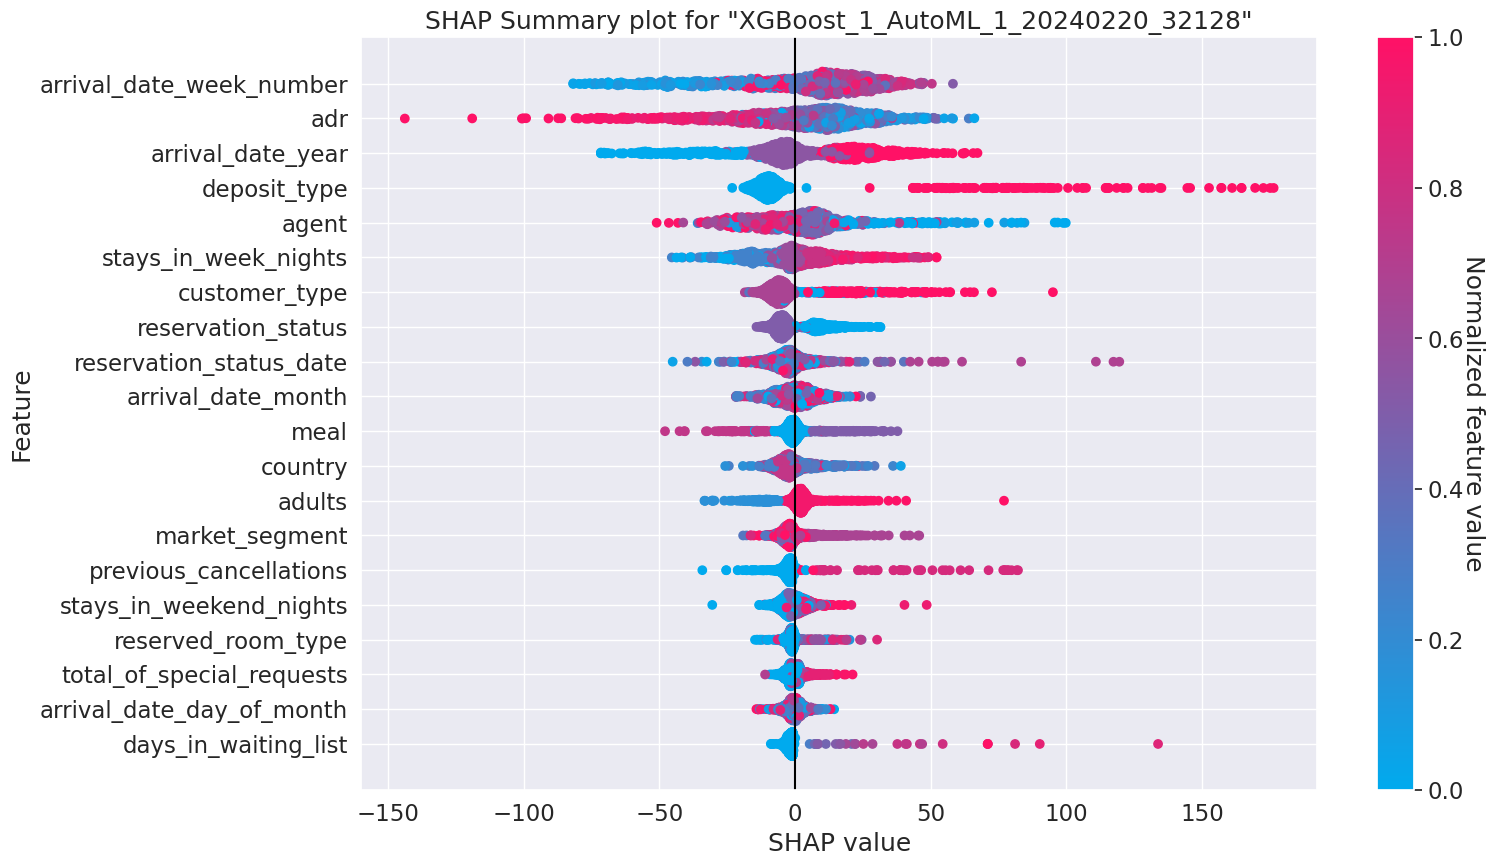

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

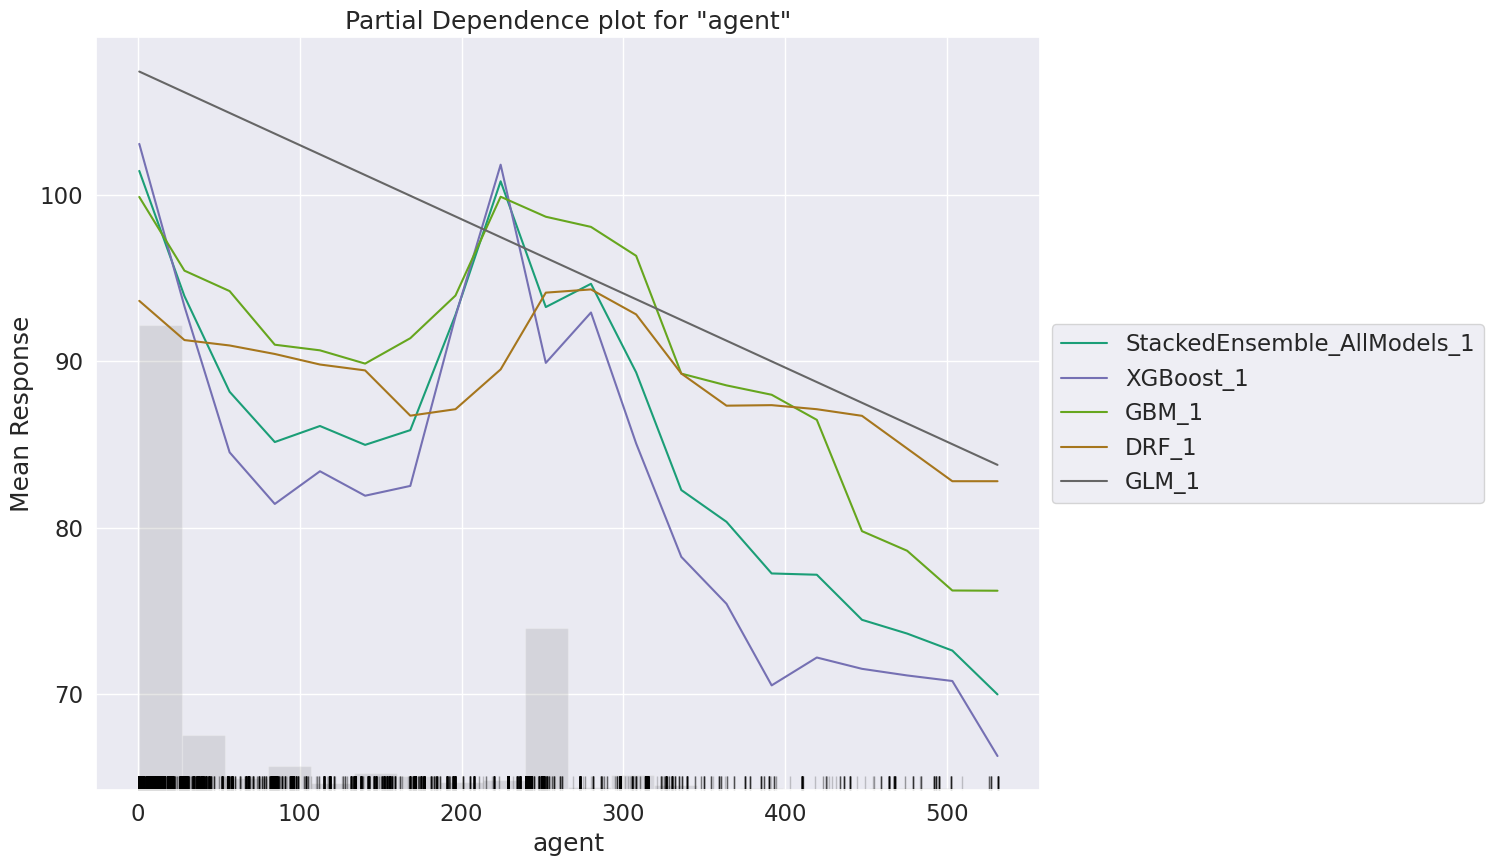

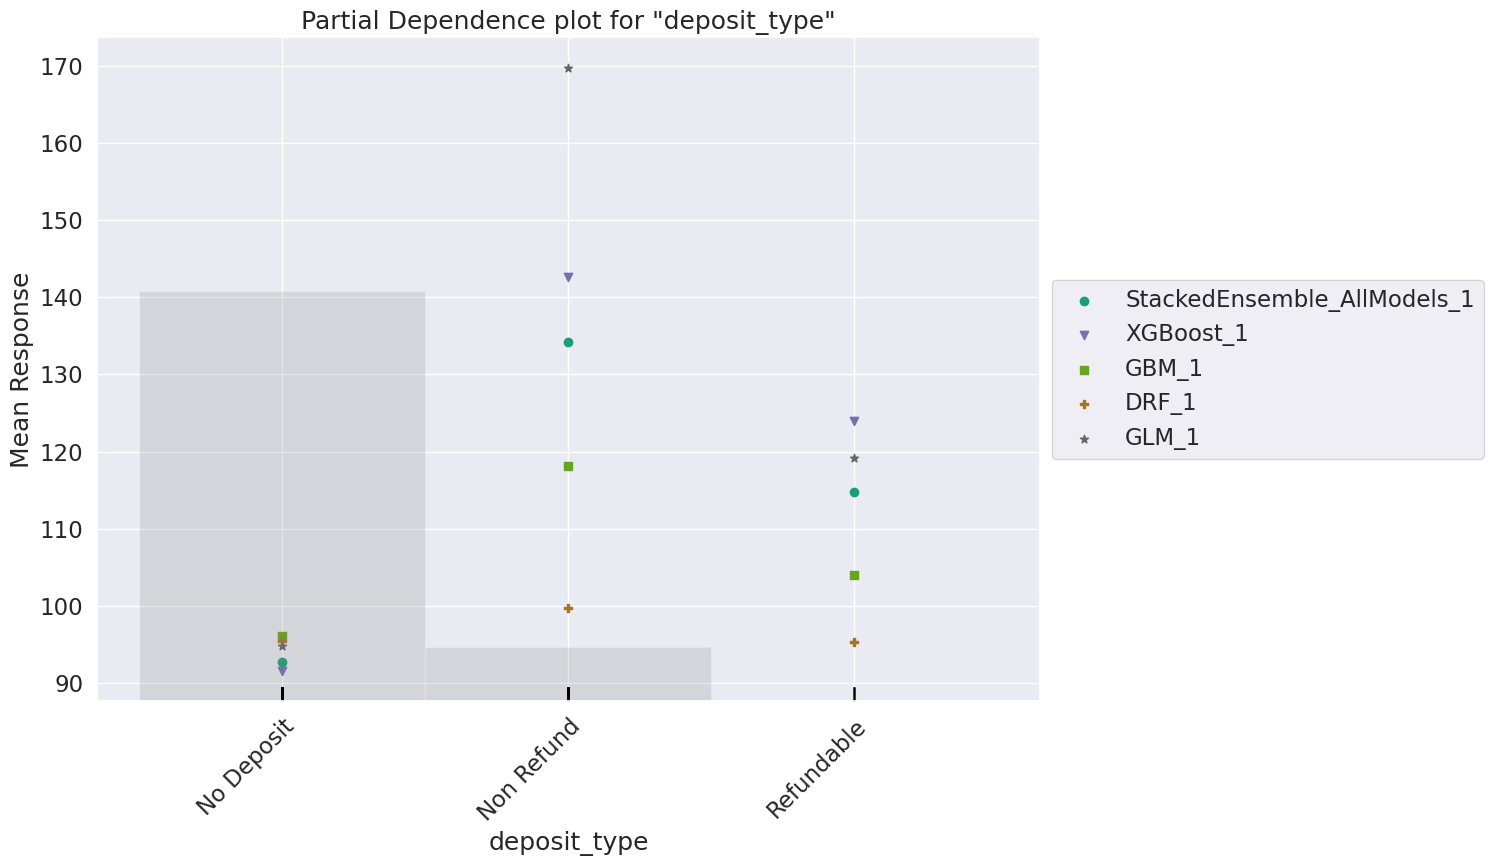

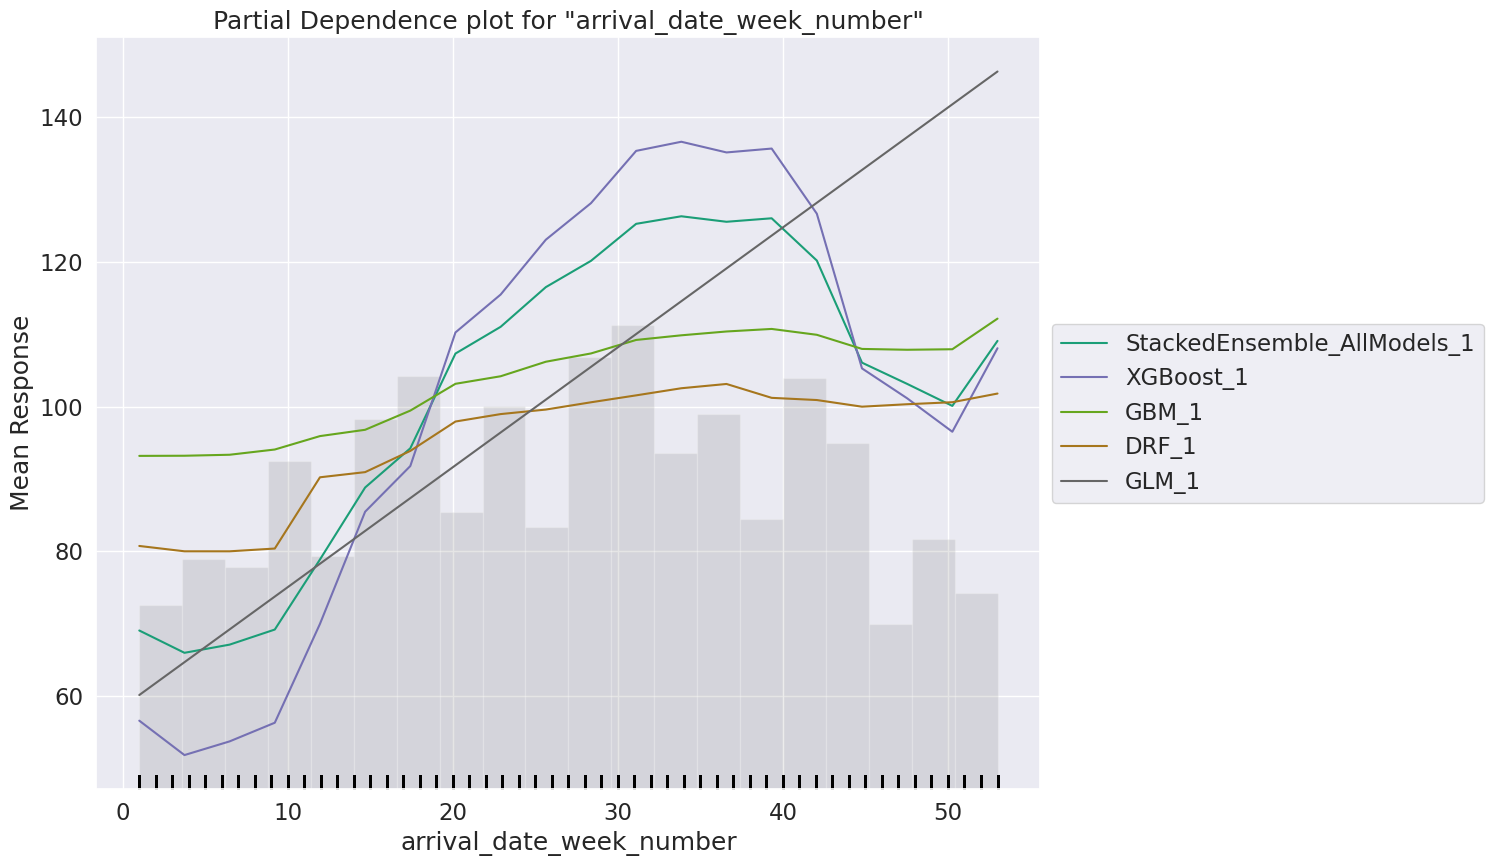

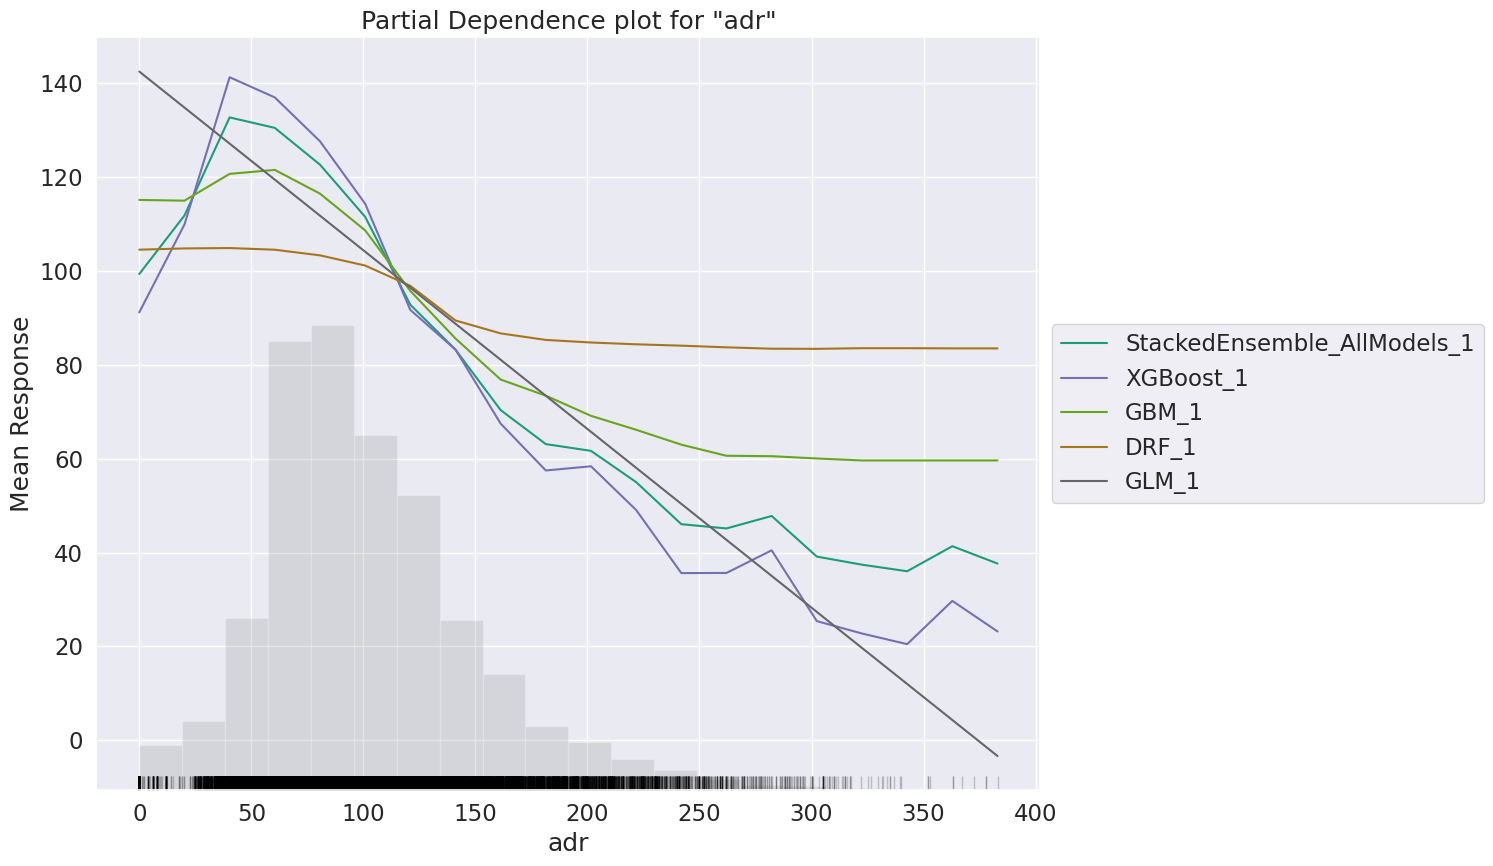

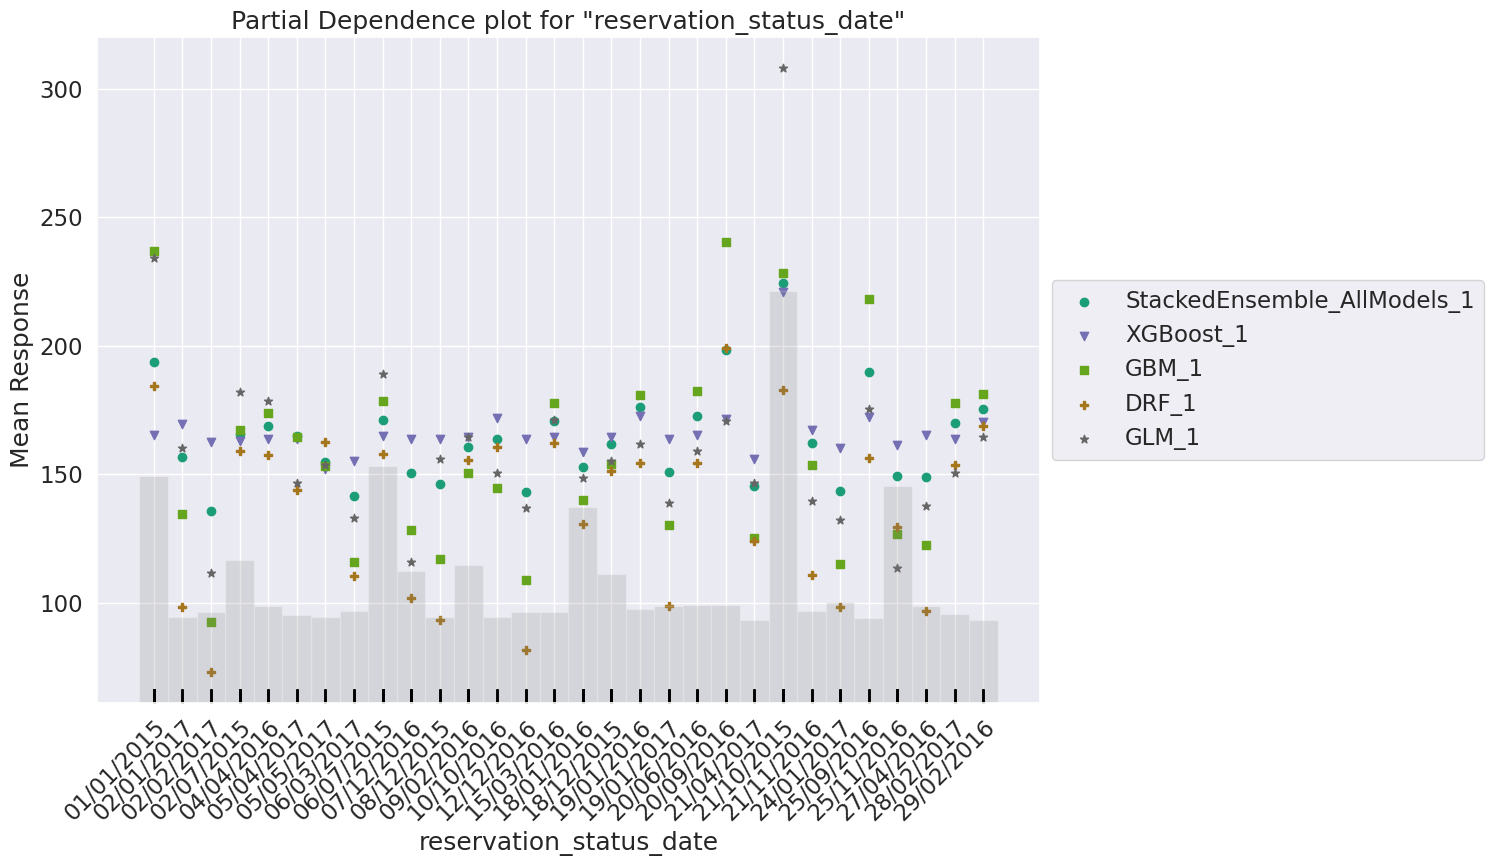

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

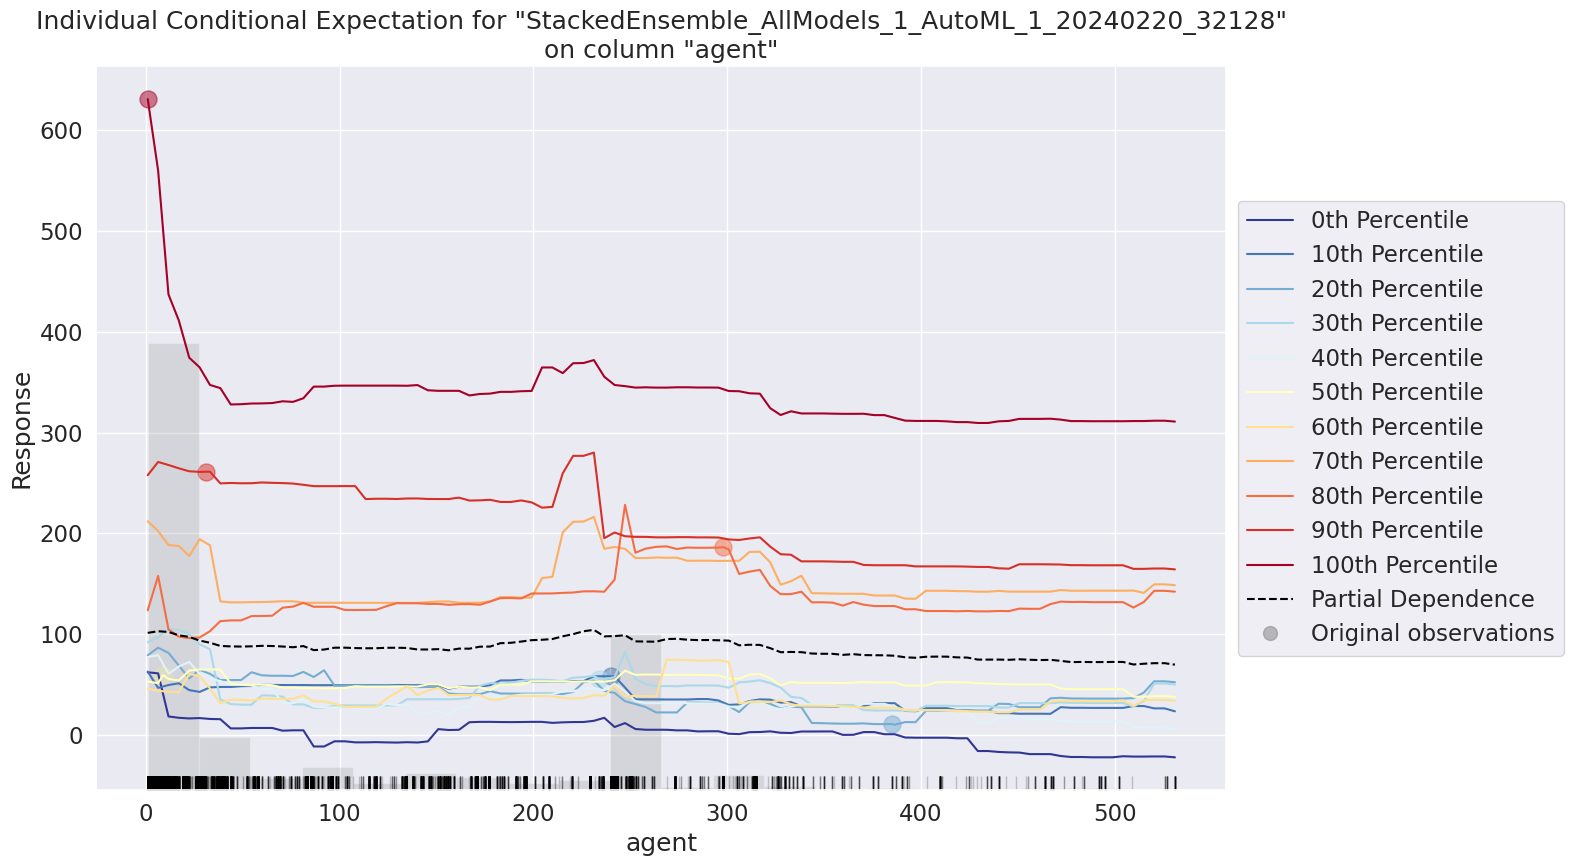

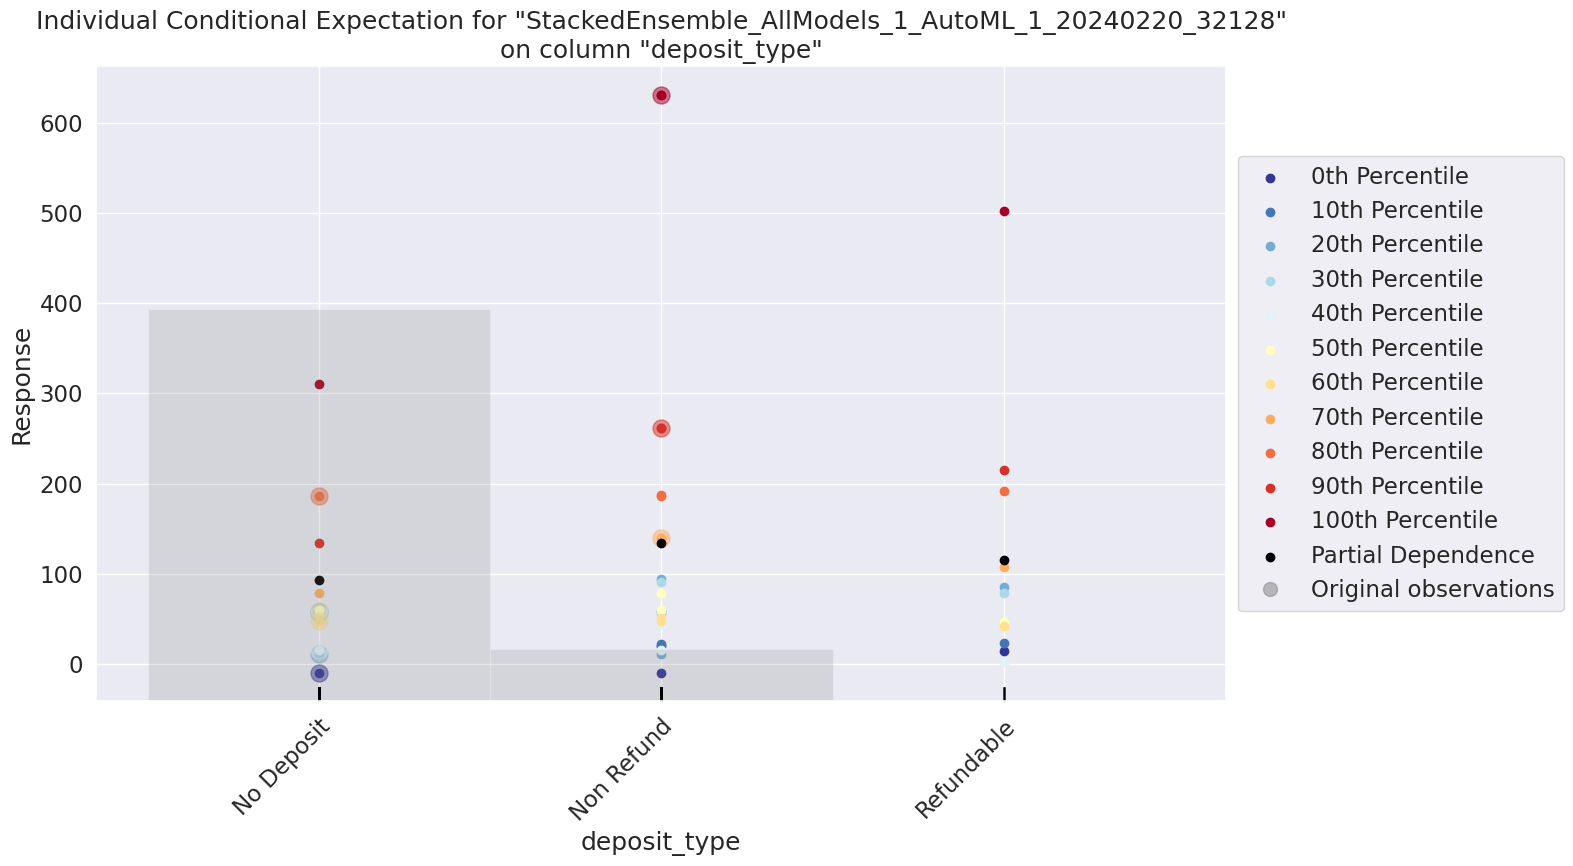

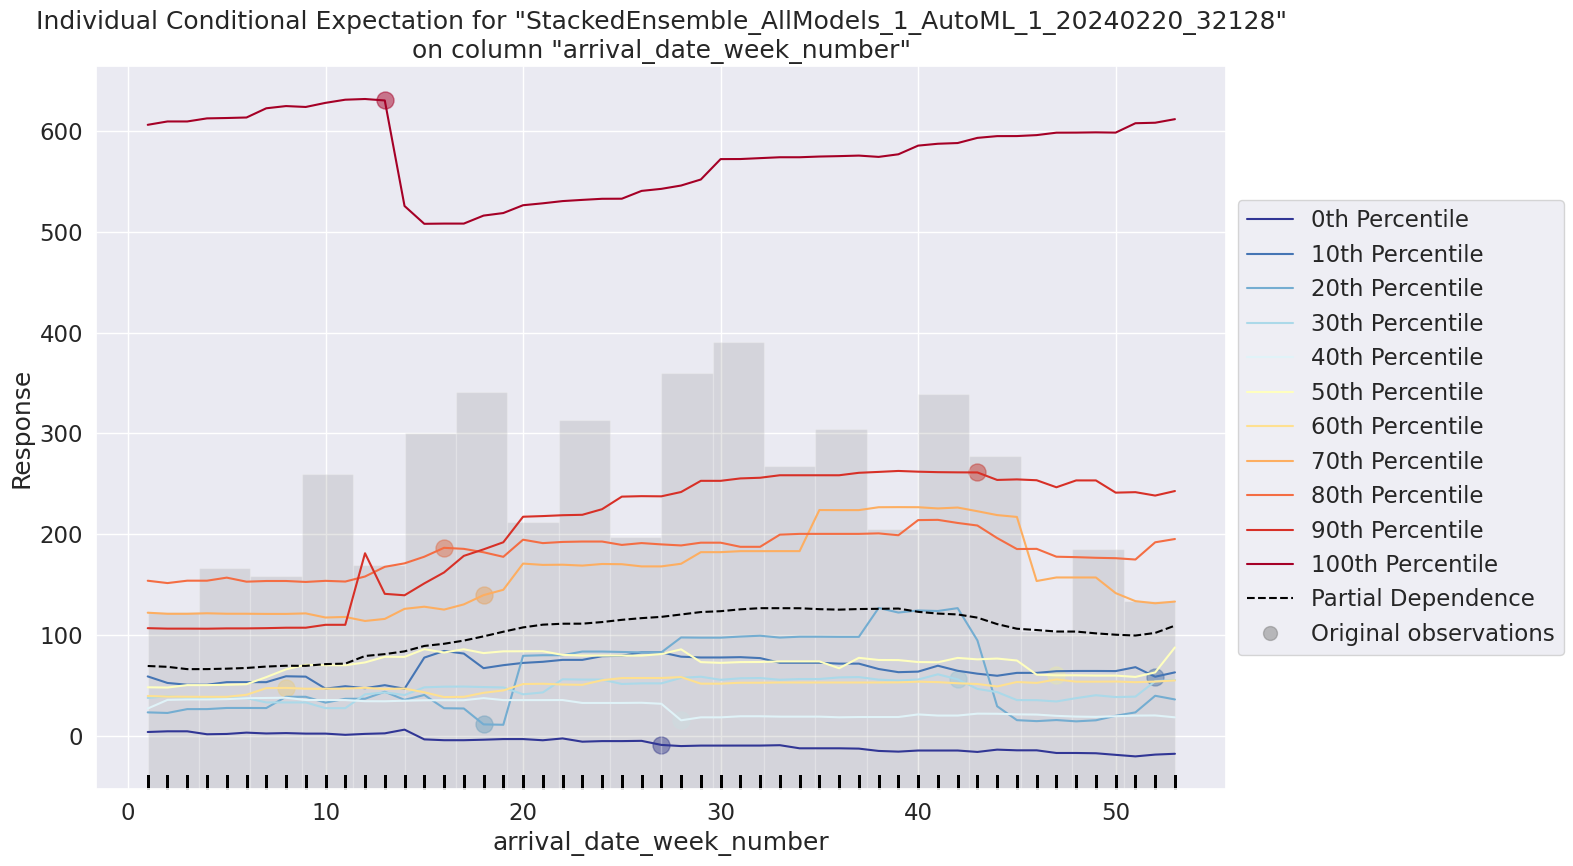

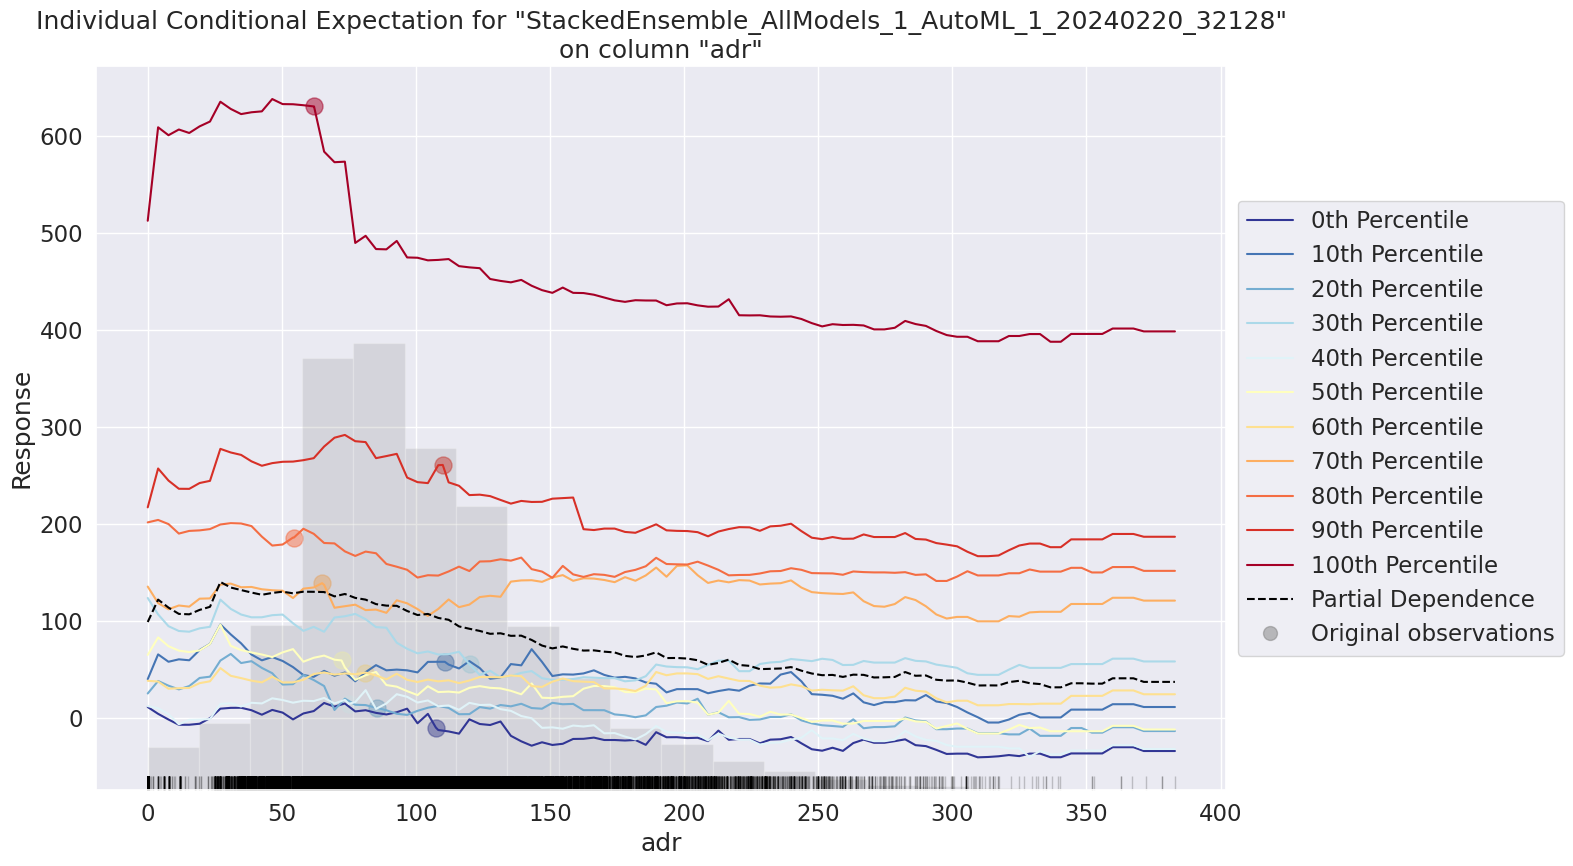

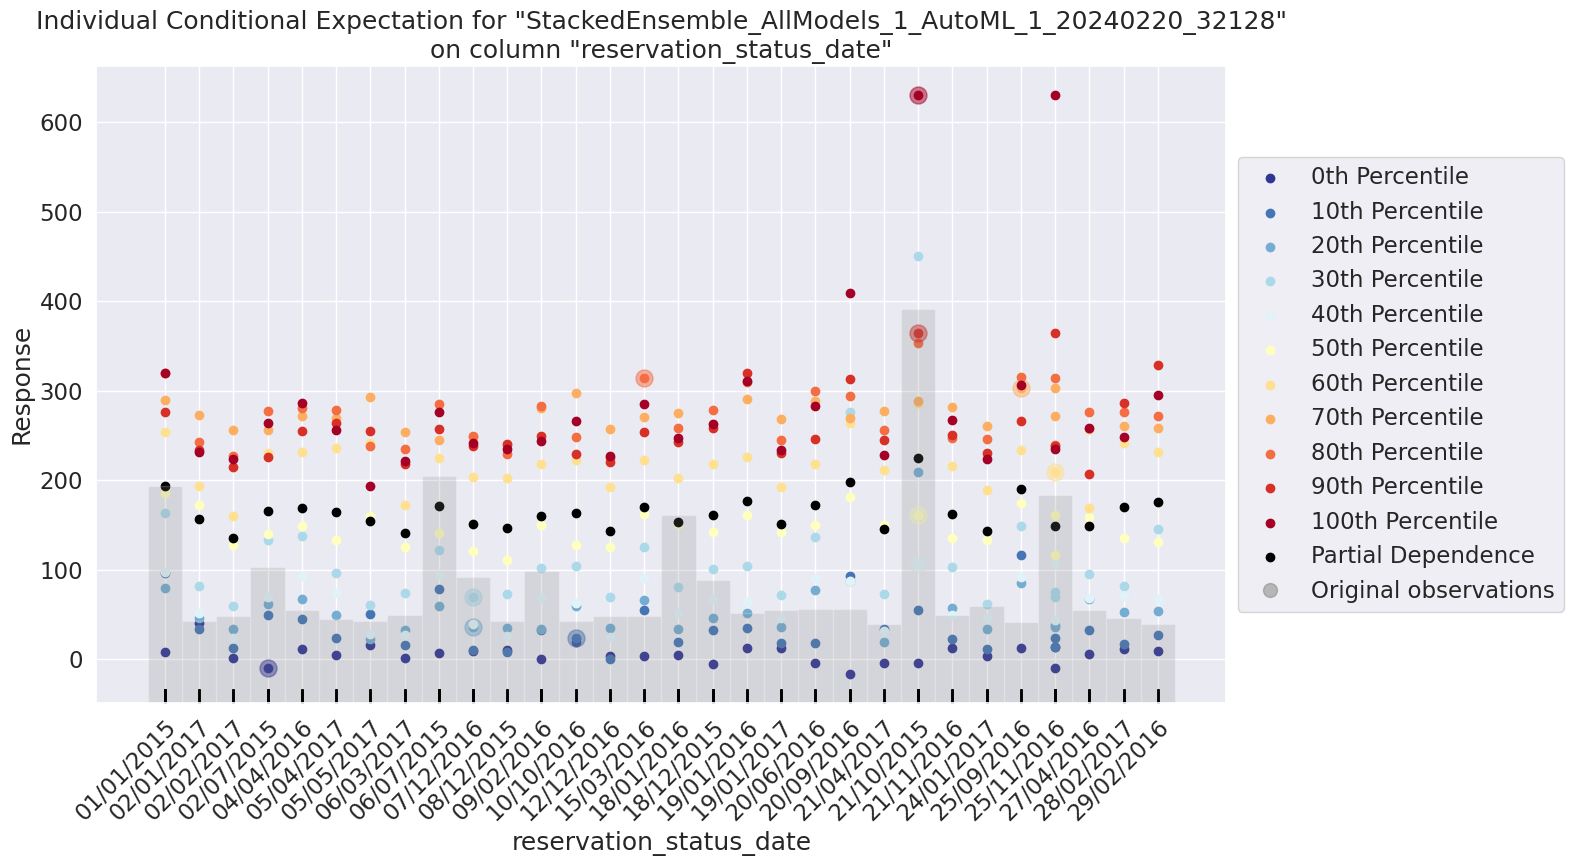

In [48]:
exa = aml.explain(df_test)

# Checking if assumptions violated

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [49]:
#Seperating the predictor and target variables
A=dff.drop(['lead_time'],axis=1)
B=dff['lead_time']

In [50]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

In [51]:

cols1 = ['is_canceled', 'arrival_date_year',
        'arrival_date_week_number', 'arrival_date_day_of_month',
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes',
        'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
        'total_of_special_requests']

model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [52]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [53]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.725764823646953e-10


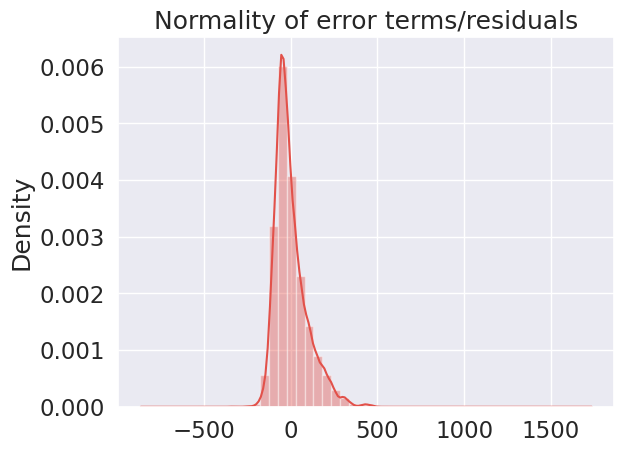

In [54]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

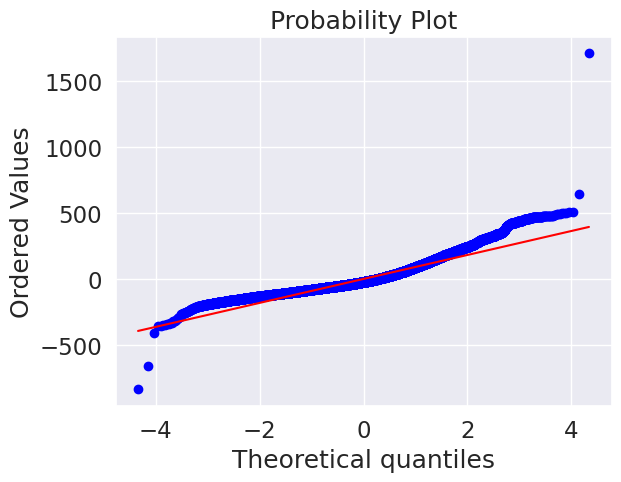

In [55]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='lead_time', ylabel='Count'>

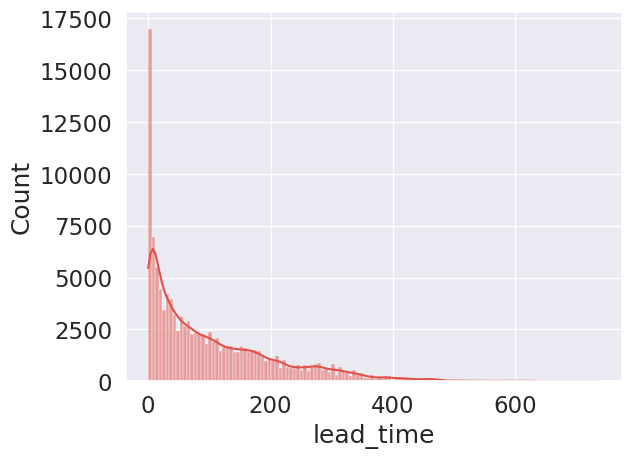

In [56]:
sns.histplot(dff.lead_time, kde = True)

# Analysing relation between all variables

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.


In [57]:
import statsmodels.formula.api as smf  # OLS model Library

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dff[['is_canceled', 'arrival_date_year',
        'arrival_date_week_number', 'arrival_date_day_of_month',
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes',
        'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
        'total_of_special_requests']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables        VIF
0                      is_canceled   1.825815
1                arrival_date_year  21.535463
2         arrival_date_week_number   5.052191
3        arrival_date_day_of_month   4.269768
4          stays_in_weekend_nights   2.505466
5             stays_in_week_nights   3.679954
6                           adults  12.395155
7                           babies   1.023826
8                is_repeated_guest   1.297813
9           previous_cancellations   1.058226
10  previous_bookings_not_canceled   1.251394
11                 booking_changes   1.164427
12            days_in_waiting_list   1.032281
13                             adr   5.647309
14     required_car_parking_spaces   1.122779
15       total_of_special_requests   1.719240

In [59]:
import h2o

pandas_df = h2o.as_list(df)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [60]:
results = smf.ols(
    "lead_time ~  is_canceled + arrival_date_year + arrival_date_week_number +  arrival_date_day_of_month + stays_in_weekend_nights + stays_in_week_nights + adults + babies + is_repeated_guest +  previous_cancellations + previous_bookings_not_canceled + booking_changes + days_in_waiting_list + adr +  required_car_parking_spaces + total_of_special_requests",
data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lead_time   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1995.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:00:36   Log-Likelihood:            -7.1300e+05
No. Observations:              119390   AIC:                         1.426e+06
Df Residuals:                  119373   BIC:                         1.426e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -6.432e+04    987.729    -65.122      0.000   -6.63e+04   -6.24e+04
is_canceled                       54.7947      0.611     89.704      0.000      53.598      55.992
arrival_date_year                 31.9098      0.490     65.147      0.000      30.950      32.870
arrival_date_week_number           1.8731      0.025     75.565      0.000       1.825       1.922
arrival_date_day_of_month         -0.0588      0.031     -1.871      0.061      -0.120       0.003
stays_in_weekend_nights            0.8847      0.319      2.773      0.006       0.259       1.510
stays_in_week_nights               7.6497      0.168     45.645      0.000       7.321       7.978
adults                            20.4868      0.497     41.181      0.000      19.512      21.462
babies                            -9.5708      2.845     -3.364      0.001     -15.147      -3.995
is_repeated_guest                -47.4722      1.752    -27.089      0.000     -50.907     -44.037
previous_cancellations             9.5526      0.335     28.505      0.000       8.896      10.209
previous_bookings_not_canceled    -1.9728      0.205     -9.643      0.000      -2.374      -1.572
booking_changes                    5.5643      0.431     12.919      0.000       4.720       6.408
days_in_waiting_list               0.9200      0.016     58.452      0.000       0.889       0.951
adr                               -0.3421      0.006    -57.557      0.000      -0.354      -0.330
required_car_parking_spaces      -17.2403      1.151    -14.980      0.000     -19.496     -14.985
total_of_special_requests         -5.6460      0.371    -15.229      0.000      -6.373      -4.919
==============================================================================
Omnibus:                    28341.797   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78673.448
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                       6.073   Cond. No.                     7.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Hyperparameter Tuning
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [61]:
dff.fillna(0,inplace = True)

In [62]:
dff.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [63]:
s = dff['lead_time']

t = dff.drop(['lead_time','market_segment','hotel', 'arrival_date_month','deposit_type','deposit_type', 'customer_type','company','distribution_channel','country','reservation_status','reservation_status_date','meal','reserved_room_type','assigned_room_type','agent'   ], axis = 1)

In [64]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [65]:

t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

Here we use RandomizedSearchCV to get the best params inorder to acheive the optimal results

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [ ]:
random_rf.best_params_

## Conclusion
A regression-based model was developed to forecast hotel prices. To exclude some of the independent variables, tests such as VIF and p-values were taken into account. The H20.ai framework was utilized to train and test the hotel dataset variables on goibibo. The 'gbm' model yielded the highest accuracy of 51% on the test data. The findings indicate that the proposed linear regression model can successfully analyze and predict hotel ratings to a certain degree, but the predictive accuracy is still limited in some cases. Further investigations into alternative models can enhance the model's performance, such as removing outliers and using booster techniques.


**Q1)Is the relationship significant?**

To determine if the relationship is significant between the variables, we can look at the p-values in the table. If a variable has a low p-value (typically less than 0.05), it is considered statistically significant, meaning that there is evidence that the variable has a relationship with the response variable (in this case, lead_time). Looking at the p-values from the OLS method, it was observed that absences, all have very low p-values , indicating that they are statistically significant and have a relationship with lead_time.
The other variables have higher p-values, indicating that they are not statistically significant and do not have a significant relationship with final grade(lead_time).

**Q2)Are any model assumptions violated?**

1.Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

2.Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.

3.No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between  lead_time as well as Dalc and Walc

4.No autocorrelation can be determined with Durbin-Watson test.

**Q3)Is there any multicollinearity in the model?**

When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05.

**Q4)In the multivariate models are predictor variables independent of all the other predictor variables?**

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that lead_time are highly correlated to each other as well as Dalc and Walc are correlated. Other than those other predictors are independent from each other.

**Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

From the variable importance plot, the most to least important variables are displayed. For my model , absences, age and  are top 4 most important variables to determine lead_time.

**Q6)Does the model make sense?**

For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.78 which is considered okay in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

**Q7)Does regularization help?**

Regularization appears to provide some benefit in terms of controlling model complexity and improving generalization performance, as seen in the cross-validation metrics.

**Q8)Which independent variables are significant?**

Variables are significant when p-value is less than 0.05. For this model except for absences,  all other variables have p-value greater than 0.05. So, it can be said that all variables are not significant.

**Q9)Which hyperparameters are important?**

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor.The best hyperparameters for this model are:- 'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 500

## REFERENCES

1. W3schools

2. Generate 'n' unique random numbers within a range

3. H20.ai- https://docs.h2o.ai/

4. OLS Model- http://net-informations.com/ds/mla/ols.html

5. Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

6. Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

7. Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML

Copyright (c) 2024 ANSH RATHOD

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.